In [2]:
## load packages 
import pandas as pd
import re
import numpy as np

## nltk imports
#!pip install nltk # can install on terminal or by uncommenting this line
#import nltk; nltk.download('punkt'); nltk.download('stopwords')
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt

## sklearn imports
from sklearn.feature_extraction.text import CountVectorizer

## lda
#!pip install gensim # can install by uncommenting this line
from gensim import corpora
import gensim

## sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## visualizing LDA--likely need to install
#!pip install pyLDAvis # can install by uncommenting this line
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

## print mult things
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## random
import random
import string; punctlist = [char for char in string.punctuation] # list of english punctuation marks

In [3]:
import spacy
sp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()
import ast
import networkx as nx
import urllib, json
from itertools import combinations
from collections import Counter
from netwulf import visualize

/opt/miniconda3/envs/qss-nlp/lib/python3.11/site-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/opt/miniconda3/envs/qss-nlp/lib/python3.11/site-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


In [4]:
data_path = '../../../data/instagram/'
output_path = '../../../output/sentiment_analysis/'

In [5]:
all_df = pd.read_csv(f"{data_path}/all_instagram_cleaned.csv")
all_df.sample(20)

/var/folders/rg/04c1t0sd7zdc_6sl31l_r9km0000gn/T/ipykernel_93722/2602339968.py:1: DtypeWarning: Columns (3,4,17) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv(f"{data_path}/all_instagram_cleaned.csv")


,content_type,creation_time,hashtags,id,is_branded_content,lang,match_type,mcl_url,modified_time,multimedia,...,post_owner.name,post_owner.username,statistics.comment_count,statistics.like_count,statistics.views,statistics.views_date_last_refreshed,text,brand,text_clean,text_clean_str
196542,videos,2022-07-21T04:13:12+00:00,"[""maincharacterenergy"",""rihannabillionaire"",""h...",1695126484450169.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-02-16T22:45:55+00:00,"[{""id"":""1695126484450169"",""type"":""video"",""dura...",...,Badgalriri⚓️,rihannnathequeen_,8.0,501.0,NaN,NaN,Her laugh 😍🥰\n\n-\n\n-\n\n#smile #beauty #rich...,Fenty Beauty,"['laugh', 'smile', 'richlif', 'rihanna', 'riha...",laugh smile richlif rihanna rihannanavi rihann...
68965,videos,2021-06-15T04:17:26+00:00,"[""kerbom3"",""satisfyingvideos"",""oddlysatisfying...",551437244509354.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-04-26T19:37:01+00:00,"[{""id"":""551437244509354"",""type"":""video"",""durat...",...,Ker Sequeira,kerbom3,35.0,14855.0,NaN,NaN,Peach 🍑 lip balm @peach_slices \n.\nFollow me ...,Glossier,"['peach', 'lip', 'balm', 'asmr', 'asmrsound', ...",peach lip balm asmr asmrsound asmreat asmrfood...
100390,videos,2023-04-21T18:36:10+00:00,"[""hydratewithlaneige"",""skincare"",""laneige"",""cr...",1471347864028173.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-02-13T00:39:25+00:00,"[{""id"":""1471347864028173"",""type"":""video"",""dura...",...,LANEIGE U.S.,laneige_us,28.0,2069.0,264624.0,2025-05-26,Did you know?! The little blue and red dot on ...,Laneige,"['know', 'littl', 'blue', 'red', 'dot', 'water...",know littl blue red dot water bank blue hyalur...
135986,videos,2025-05-18T12:32:22+00:00,NaN,1223646255501477.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-20T15:42:28+00:00,"[{""id"":""1223646255501477"",""type"":""video"",""dura...",...,Catherine Harshi Gwalani,msdesiborn,6.0,NaN,20433.0,2025-05-29,Some questions we discussed on the LIVE 💕🌸\n\n...,Etude,"['question', 'discuss', 'live', 'heal', 'acn',...",question discuss live heal acn heal acn scar t...
91884,albums,2024-10-04T06:29:43+00:00,"[""lsabeautybuys"",""laneigexjin"",""laneigeandjin""...",653553091052928.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-10-09T17:39:17+00:00,"[{""id"":""1045534690369584"",""type"":""photo"",""url""...",...,Lifestyle Asia Singapore,lifestyleasiasg,23.0,351.0,6117.0,2025-05-26,BTS’s Jin and Laneige are a match made in skin...,Laneige,"['btss', 'jin', 'match', 'made', 'heaven', 'so...",btss jin match made heaven south korean cosmet...
15952,albums,2020-01-16T12:48:52+00:00,"[""once"",""weloveyoumomo"",""momo"",""\ud2b8\uc640\u...",1402211727781563.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-06-27T07:38:08+00:00,"[{""id"":""1016959437284275"",""type"":""photo"",""url""...",...,もも fanpage,twicemomofanpage_,1.0,1463.0,NaN,NaN,[200116] Momo’s promo photo for Estée Lauder. ...,Estée Lauder,"['momo', 'promo', 'photo', 'esté', 'gorgeou', ...",momo promo photo esté gorgeou esteelauderkr we...
4743,photos,2024-01-31T02:00:22+00:00,"[""herworldpov"",""linkinbio"",""herworldsingapore""...",760585982171423.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-04-30T04:56:30+00:00,"[{""id"":""760585982171423"",""type"":""photo"",""url"":...",...,Her World Singapore,herworldsingapore,0.0,14.0,5725.0,2025-05-26,American supermodel Arizona Muse started model...,Estée Lauder,"['american', 'supermodel', 'arizona', 'muse', ...",american supermodel arizona muse start model t...
163196,videos,2022-09-30T09:41:25+00:00,"[""kskincare"",""cosrx"",""koreanskincare"",""snailmu...",1772287336718229.0,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-02-12T02:00:12+00:00,"[{""id"":""1772287336718229""

In [6]:
## function provided
def create_dtm(list_of_strings, metadata):
    """ 
    Function to create dense document-term matrix (DTM) from a list of strings and provided metadata. 
    A sparse DTM is a list of term_index/doc_index tuples: if a given term occurs in a given doc at least once, 
        then this count is listed as a tuple; if not, that term/doc pair is omitted. 
    In a dense DTM, each row is one text (e.g., an Airbnb listing), each column is a term, and 
        each cell indicates the frequency of that word in that text. 
    
    Parameters:
        list_of_strings (Series): each row contains a preprocessed string (need not be tokenized)
        metadata (DataFrame): contains document-level covariates
    
    Returns:
        Dense DTM with metadata on left and then one column per word in lexicon
    """
    
    # initialize a sklearn tokenizer; this helps us tokenize the preprocessed string input
    vectorizer = CountVectorizer(lowercase = True, max_features=5000, min_df=5,           # ignore rare words
        stop_words='english')  # or try 10000 if you can afford more memory) 
    dtm_sparse = vectorizer.fit_transform(list_of_strings)
    print('Sparse matrix form:\n', dtm_sparse[:3]) # take a look at sparse representation
    print()
    
    # switch the dataframe from the sparse representation to the normal dense representation (so we can treat it as regular dataframe)
    dtm_dense_named = pd.DataFrame(dtm_sparse.todense(), columns=vectorizer.get_feature_names_out ())
    print('Dense matrix form:\n', dtm_dense_named.head()) # take a look at dense representation
    dtm_dense_named_withid = pd.concat([metadata.reset_index(drop=True), dtm_dense_named], axis = 1) # add back document-level covariates

    return(dtm_dense_named_withid)

In [20]:
## process text more, lower and to string
# all_df["text_clean_str"] = all_df["text_clean"].apply(lambda tokens: " ".join(tokens).lower() if isinstance(tokens, (list, tuple)) else "")

## Sentiment Analysis

In [7]:
## initialize a scorer
sent_obj = SentimentIntensityAnalyzer()
print(type(sent_obj))
## score one listing
practice_listing = "NICE AND COZY LITTLE APT AVAILABLE"
sentiment_example = sent_obj.polarity_scores(practice_listing)
sentiment_example

<class 'vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer'>


{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}

In [8]:
all_df["sentiment"] = all_df["text_clean_str"].astype(str).apply(sent_obj.polarity_scores)

In [9]:
all_df["compound"] = all_df["sentiment"].apply(lambda x: x["compound"])

<Axes: xlabel='statistics.views', ylabel='compound'>

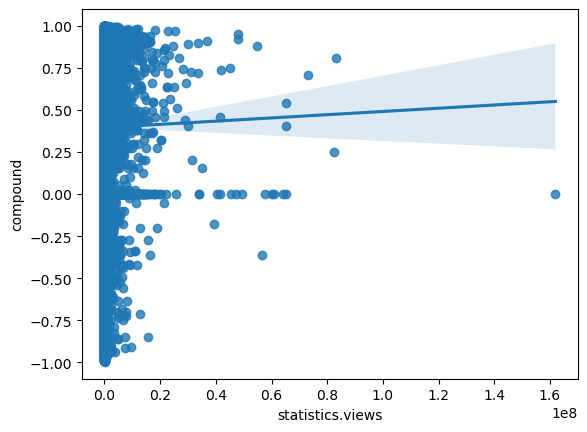

In [10]:
import seaborn as sns
sns.regplot(x = all_df["statistics.views"], y = all_df.compound)
plt.savefig(output_path + "sentiment_vs_views.png", dpi=300, bbox_inches='tight')

<Figure size 1200x600 with 0 Axes>

/var/folders/rg/04c1t0sd7zdc_6sl31l_r9km0000gn/T/ipykernel_93722/712586809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x="brand", y="compound", palette="Set2")


<Axes: xlabel='brand', ylabel='compound'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Estée Lauder'),
  Text(1, 0, 'Tarte'),
  Text(2, 0, 'Innisfree'),
  Text(3, 0, 'e.l.f'),
  Text(4, 0, 'Glossier'),
  Text(5, 0, 'Laneige'),
  Text(6, 0, 'Sulwhasoo'),
  Text(7, 0, 'Etude'),
  Text(8, 0, 'COSRX'),
  Text(9, 0, 'Fenty Beauty')])

Text(0.5, 1.0, 'Sentiment Distribution per Brand')

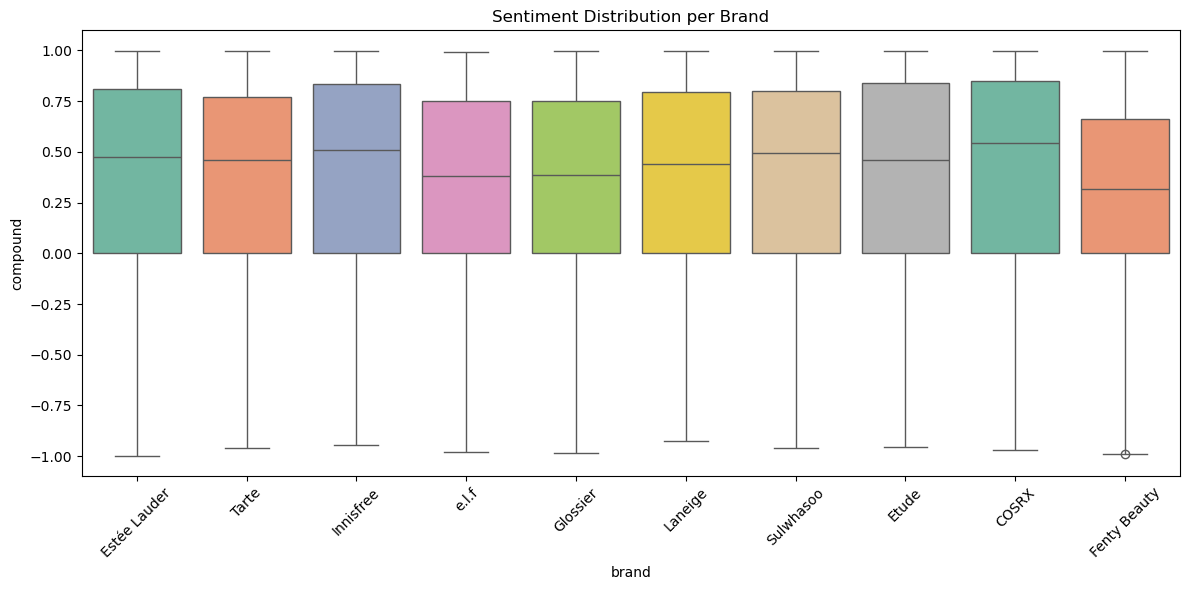

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_df, x="brand", y="compound", palette="Set2")
plt.xticks(rotation=45)
plt.title("Sentiment Distribution per Brand")
plt.tight_layout()
plt.show()
plt.savefig("sentiment_distribution_per_brand.png", dpi=300, bbox_inches='tight')
plt.savefig(output_path + "sentiment_distribution_per_brand.png", dpi=300, bbox_inches='tight')

<Axes: ylabel='brand'>

Text(0.5, 1.0, 'Average Sentiment Score by Brand')

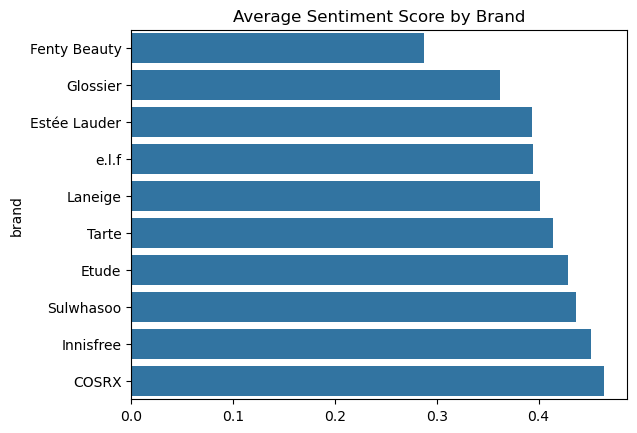

In [12]:
avg_sentiment = all_df.groupby("brand")["compound"].mean().sort_values()
sns.barplot(x=avg_sentiment.values, y=avg_sentiment.index)
plt.title("Average Sentiment Score by Brand")
plt.savefig(output_path + "average_sentiment_by_brand.png", dpi=300, bbox_inches='tight')

In [14]:
korean_brands = ["Innisfree", "Laneige", "Sulwhasoo", "Etude", "COSRX"]
all_df["region"] = all_df["brand"].apply(lambda b: "Korean" if b in korean_brands else "Western")

In [15]:
all_df["engagement_rate"] = all_df["statistics.like_count"] / (all_df["statistics.views"] + 1)
all_df["log_engagement"] = np.log1p(all_df["engagement_rate"])

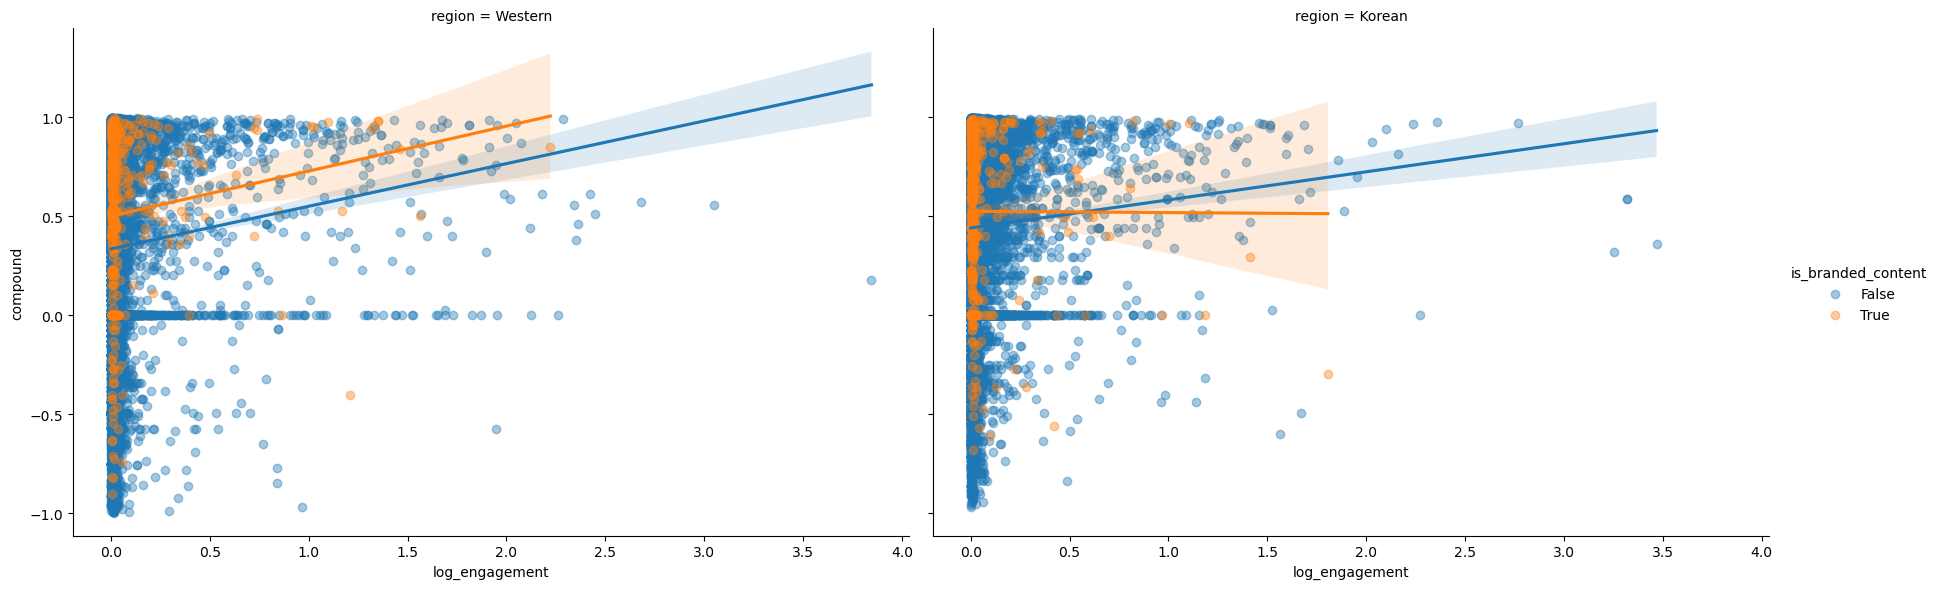

In [16]:
sns.lmplot(
    data=all_df,
    x="log_engagement",
    y="compound",
    hue="is_branded_content",
    col="region",
    scatter_kws={"alpha": 0.4},
    height=6,
    aspect=1.5
)
plt.savefig(output_path + "sentiment_vs_engagement_vs_country.png", dpi=300, bbox_inches='tight')

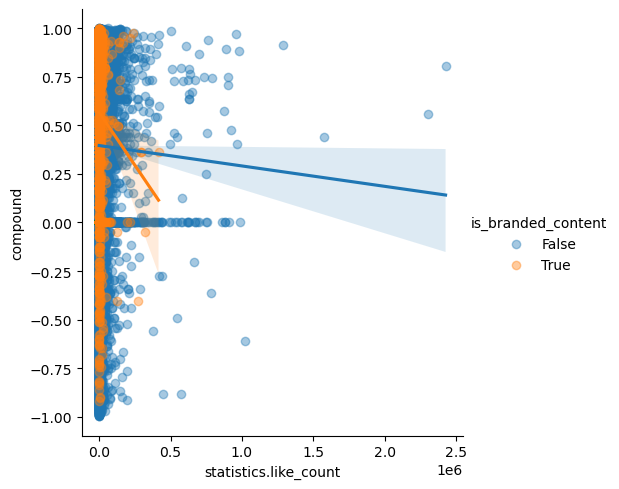

In [17]:
sns.lmplot(data=all_df, x="statistics.like_count", y="compound", hue="is_branded_content", scatter_kws={"alpha": 0.4})
plt.savefig(output_path + "sentiment_vs_like_count.png", dpi=300, bbox_inches='tight')

In [18]:
## convert to list 
all_df['hashtags'] = all_df['hashtags'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x
)
hashtag_df = all_df.explode("hashtags")

In [19]:
#normalize hashtag text
hashtag_df["hashtags"] = hashtag_df["hashtags"].astype(str).str.lower().str.strip()
hashtag_df = hashtag_df[hashtag_df["hashtags"].notna() & (hashtag_df["hashtags"] != "")]

In [20]:
# Aggregate sentiment per brand and hashtag
hashtag_sentiment = (
    hashtag_df.groupby(["brand", "hashtags"])
    .agg(avg_sentiment=("compound", "mean"), count=("hashtags", "count"))
    .reset_index()
)

In [21]:
hashtag_stats = (
    hashtag_df.groupby("hashtags")
    .agg(avg_sentiment=("compound", "mean"), count=("compound", "count"))
    .sort_values(by="avg_sentiment", ascending=False)
)

In [22]:
filtered = hashtag_stats[hashtag_stats["count"] >= 50]
filtered.head()

,avg_sentiment,count
hashtags,,
giveawaytime,0.935403,115
giveaways,0.926472,136
giveawaycontest,0.923157,127
skintreatsmaldives,0.919447,66
beatbybarbii,0.916275,162


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'COSRX: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/COSRX: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Estée Lauder: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Estée Lauder: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Etude: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Etude: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Fenty Beauty: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Fenty Beauty: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Glossier: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Glossier: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Innisfree: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Innisfree: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Laneige: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Laneige: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Sulwhasoo: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Sulwhasoo: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Tarte: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/Tarte: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'e.l.f: Top 10 Hashtags by Average Sentiment (min 10 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, '../../../output/sentiment_analysis/e.l.f: Bottom 10 Hashtags by Average Sentiment (min 50 uses)')

Text(0.5, 0, 'Avg Compound Sentiment')

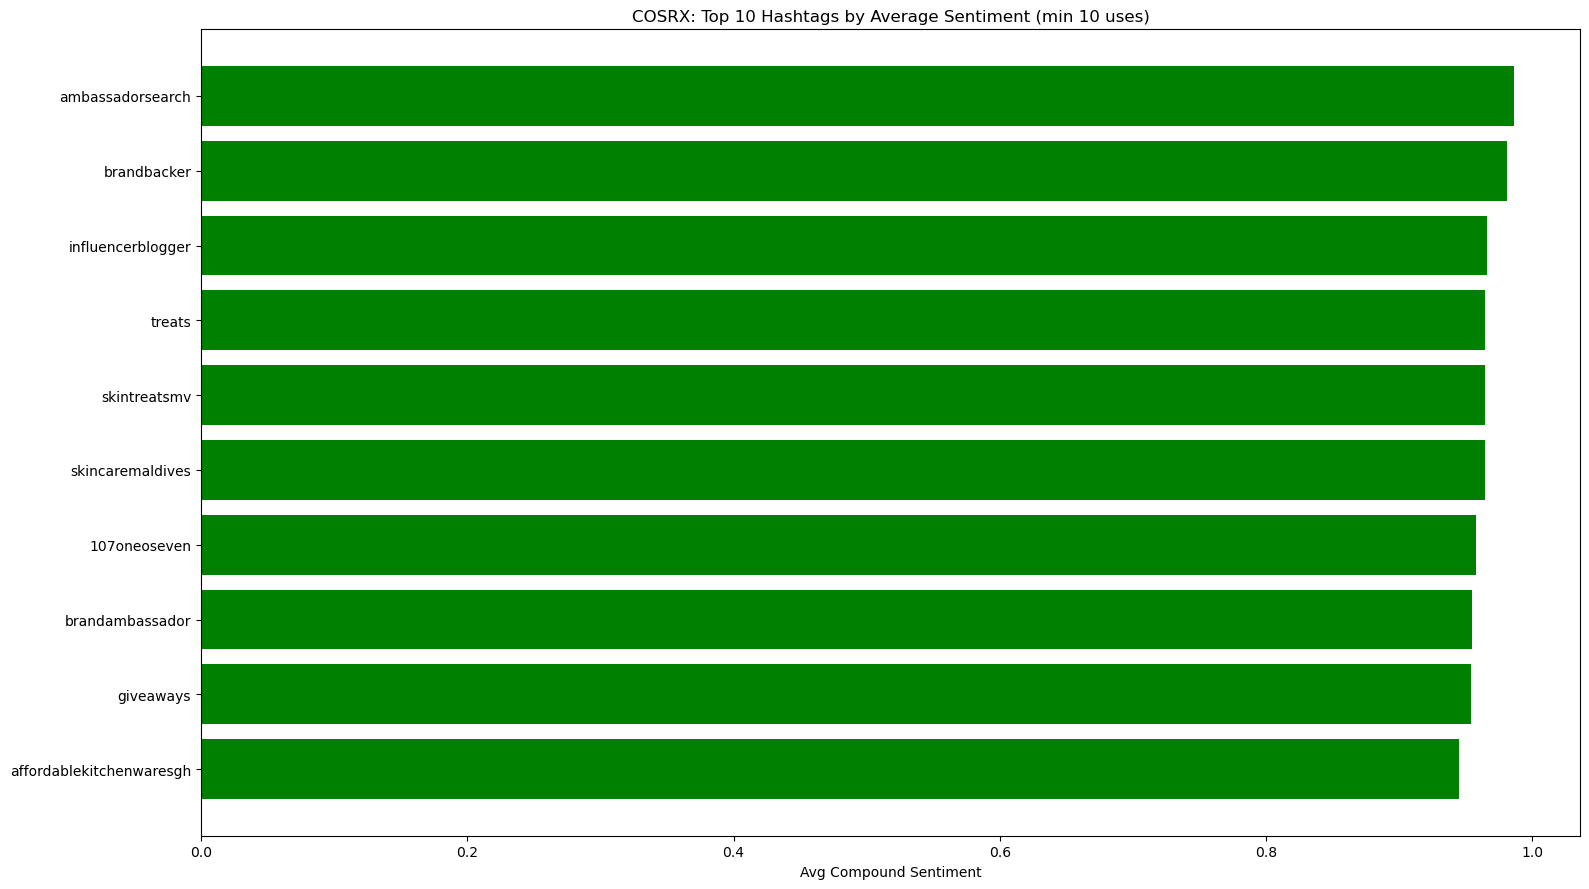

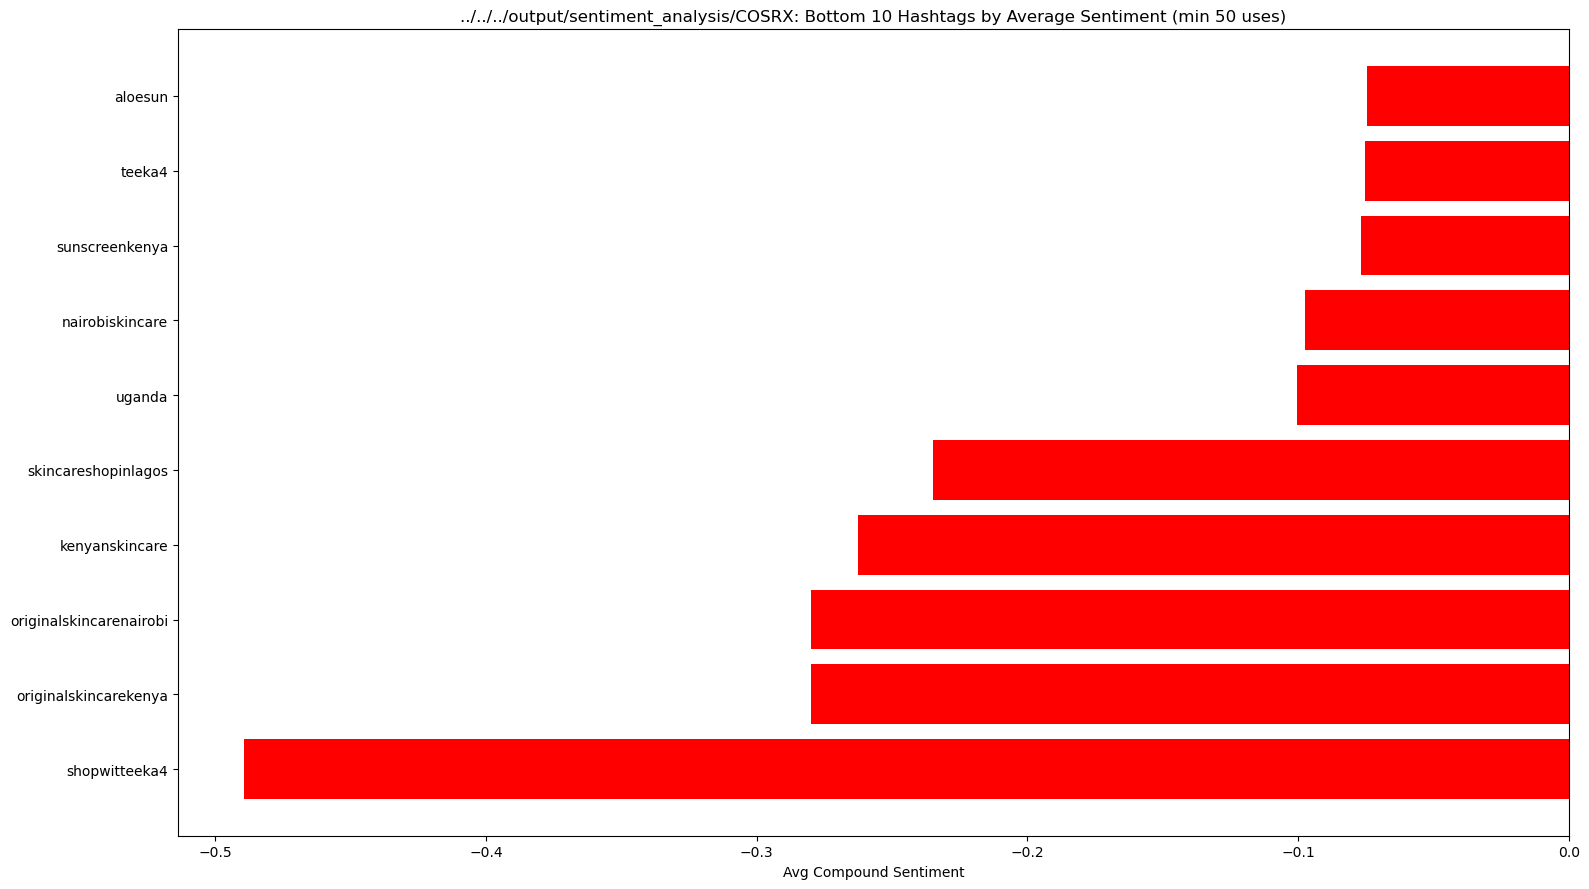

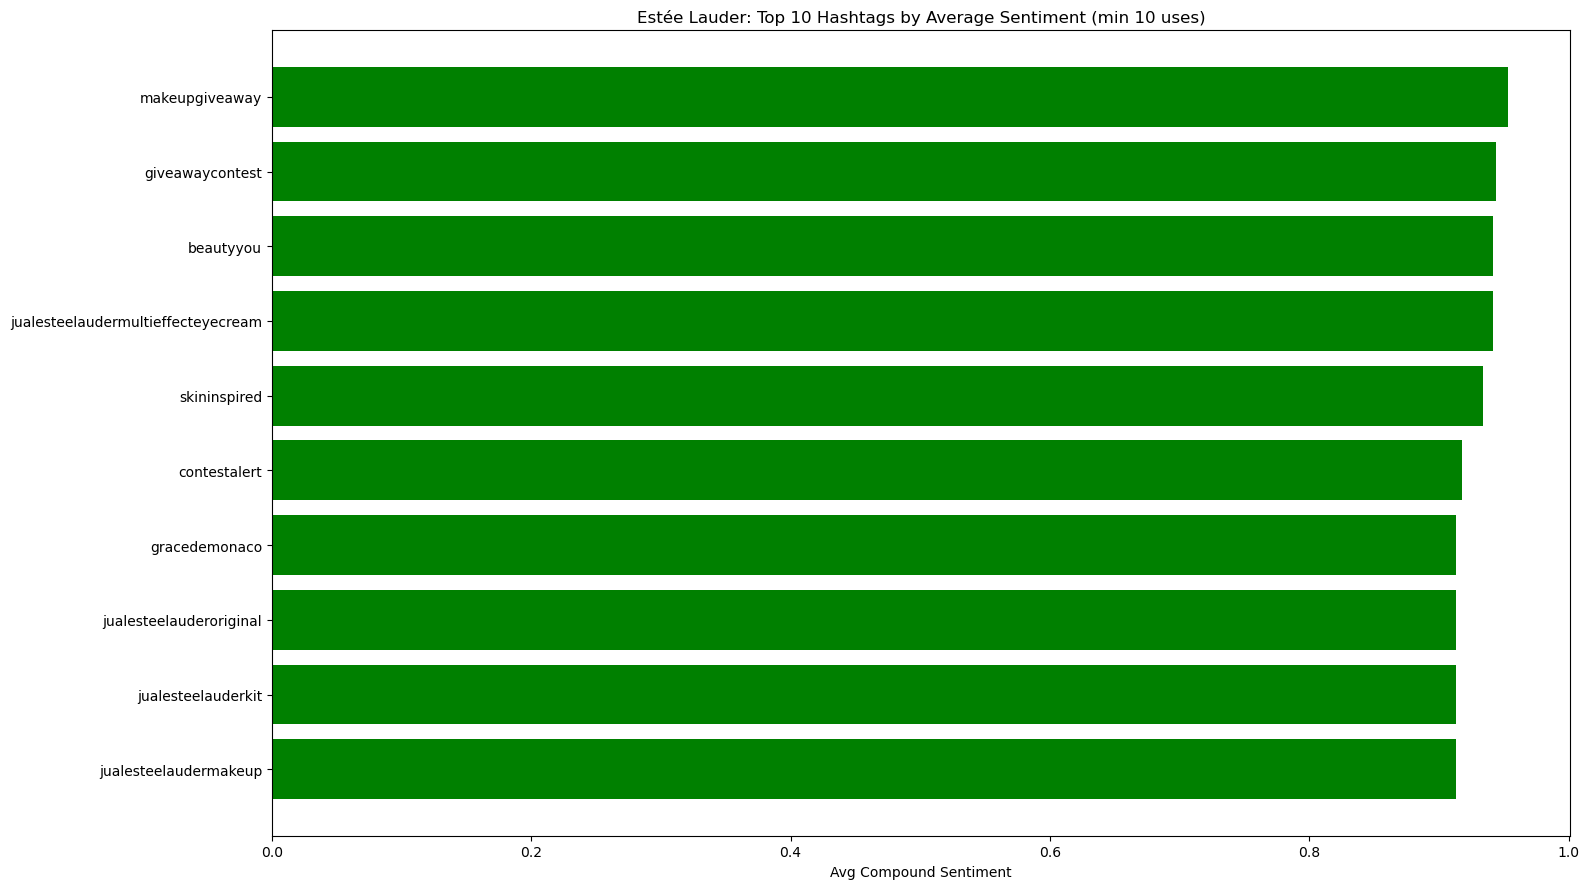

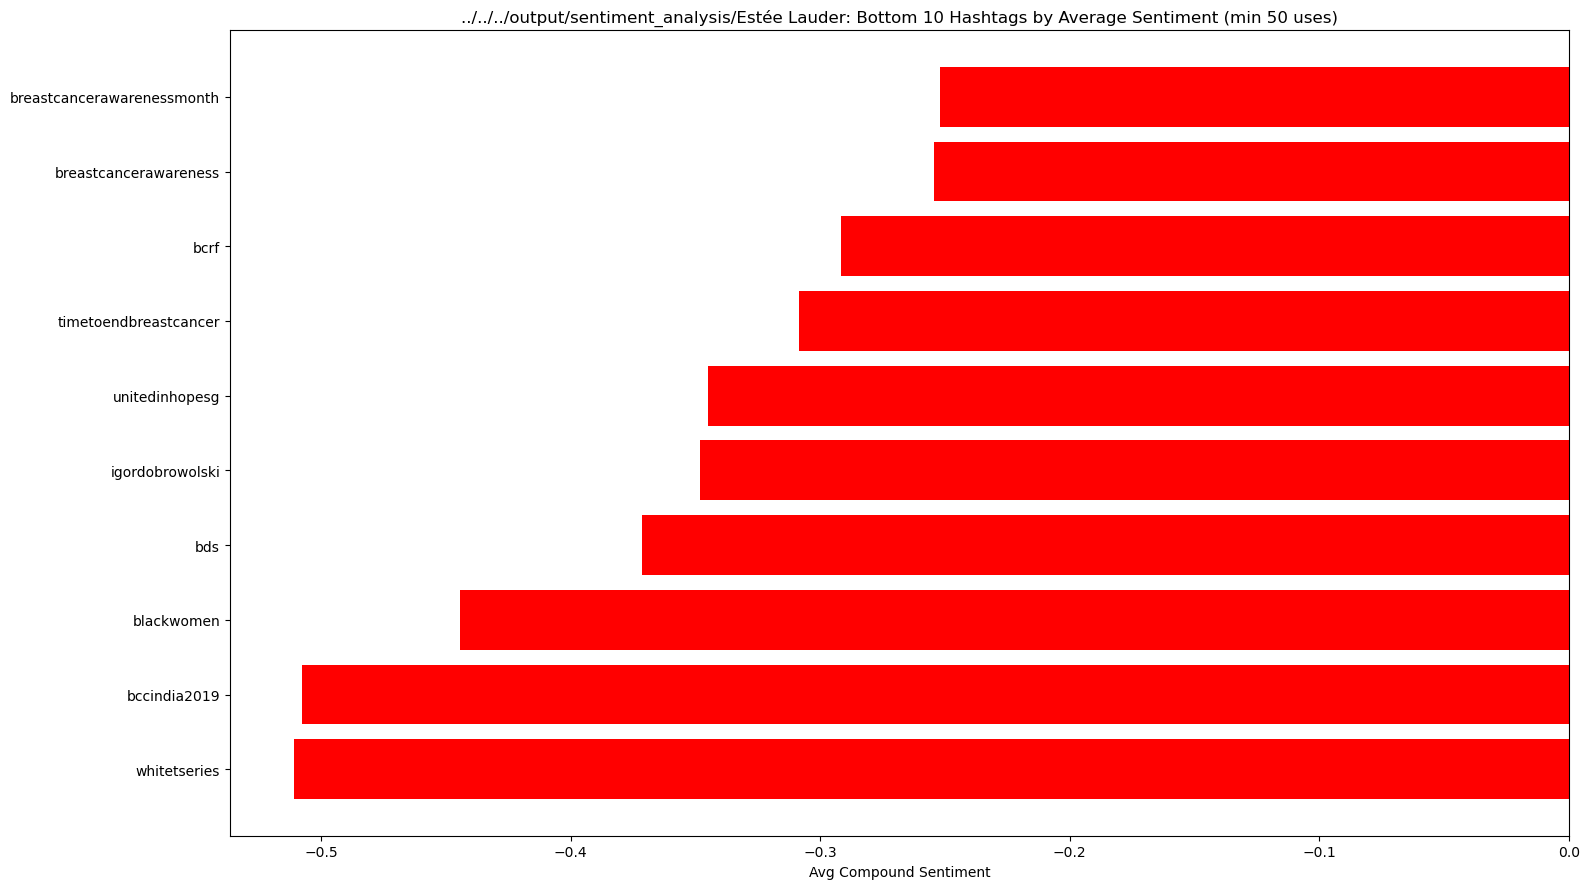

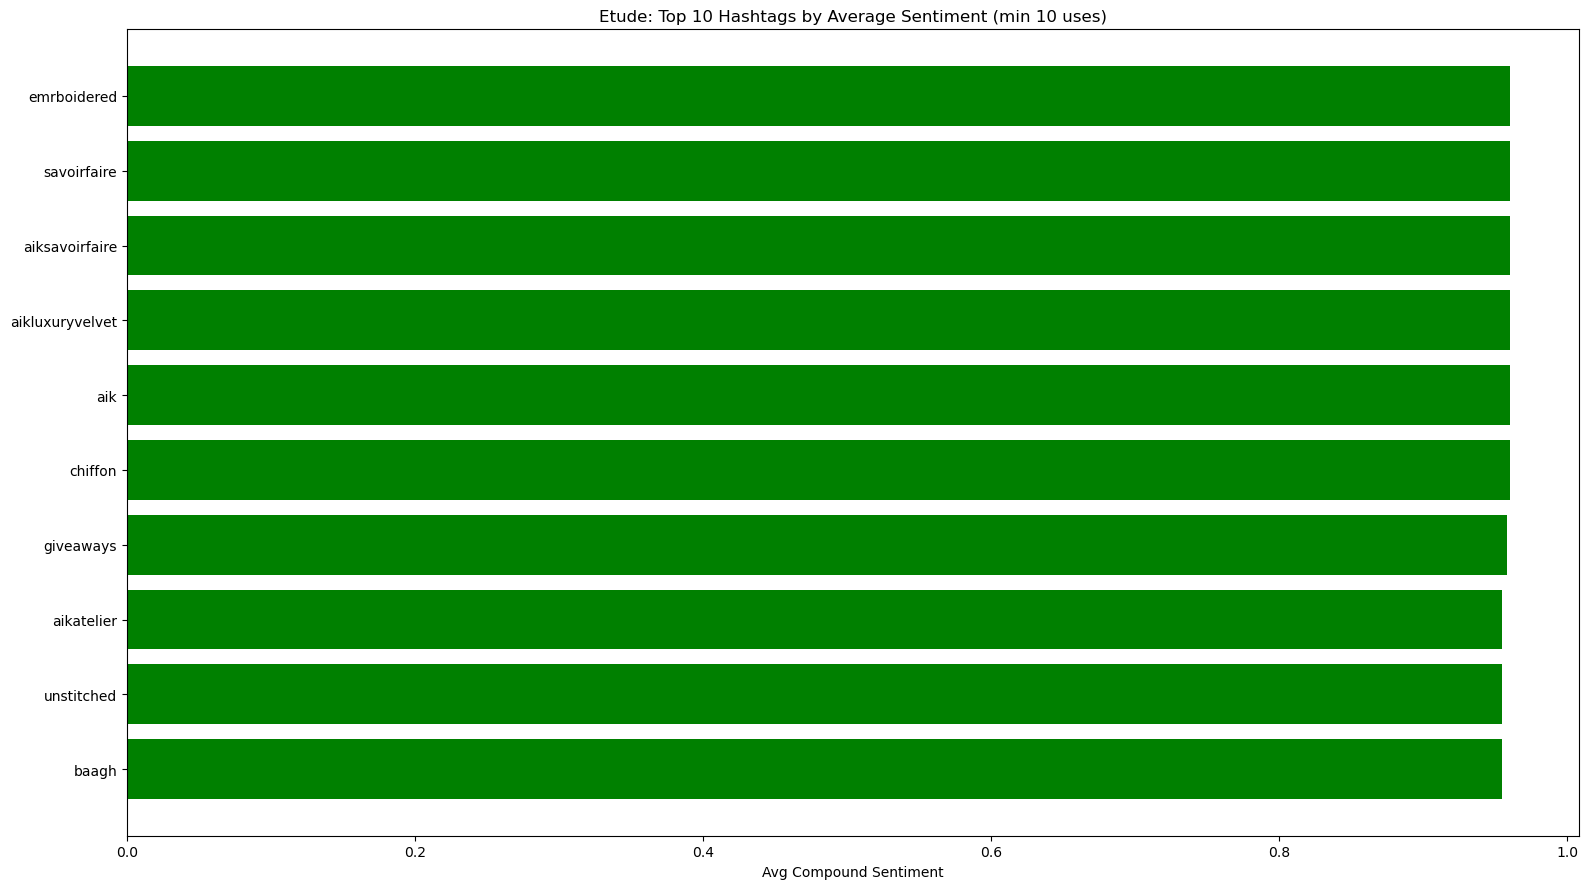

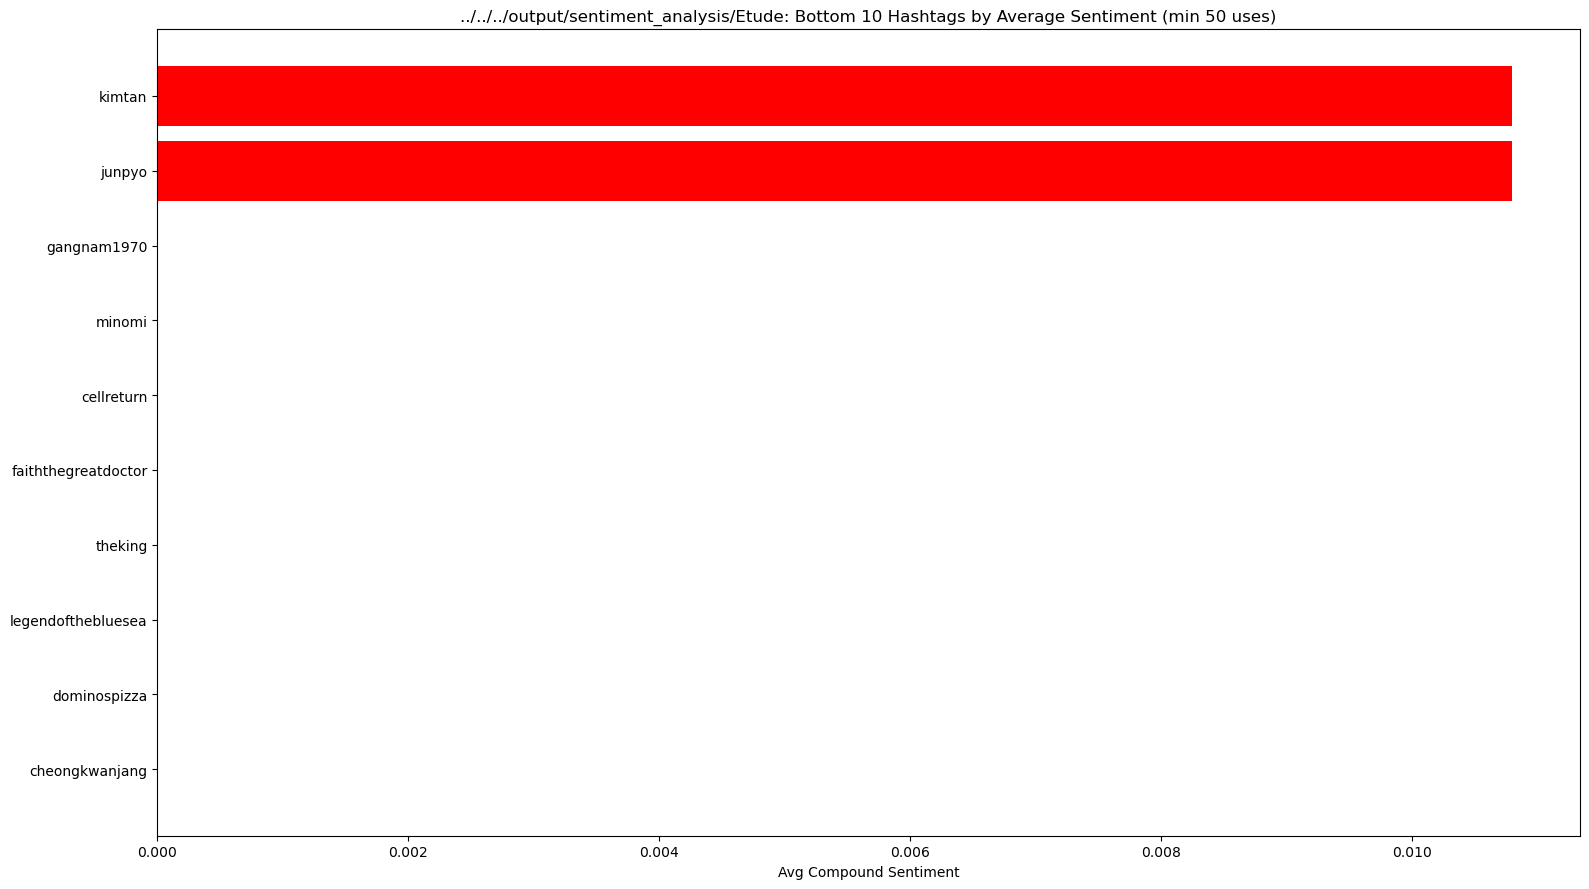

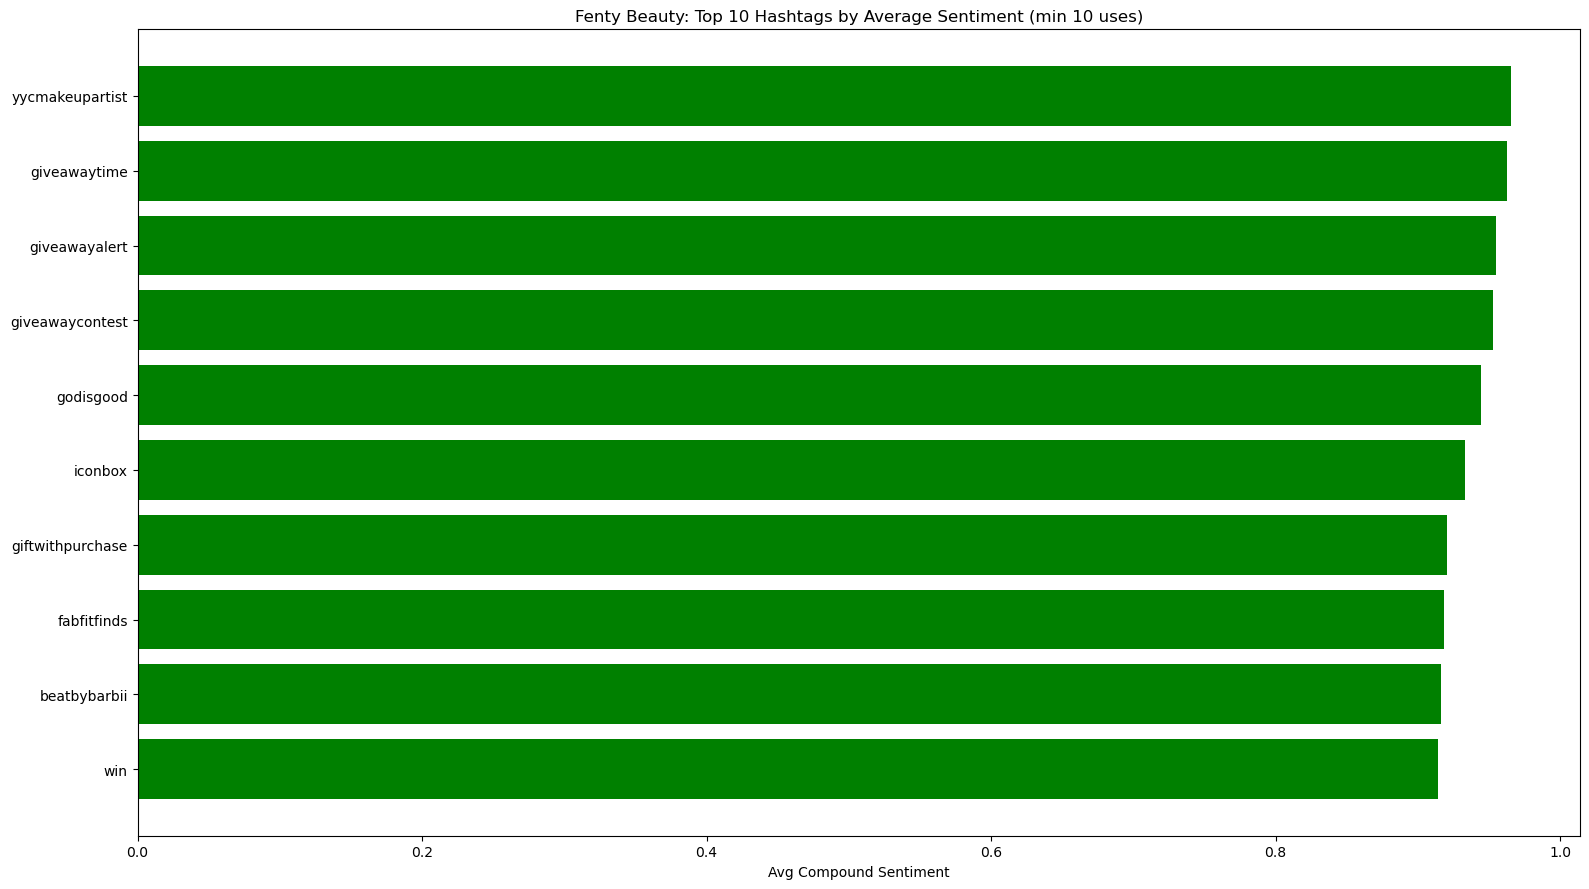

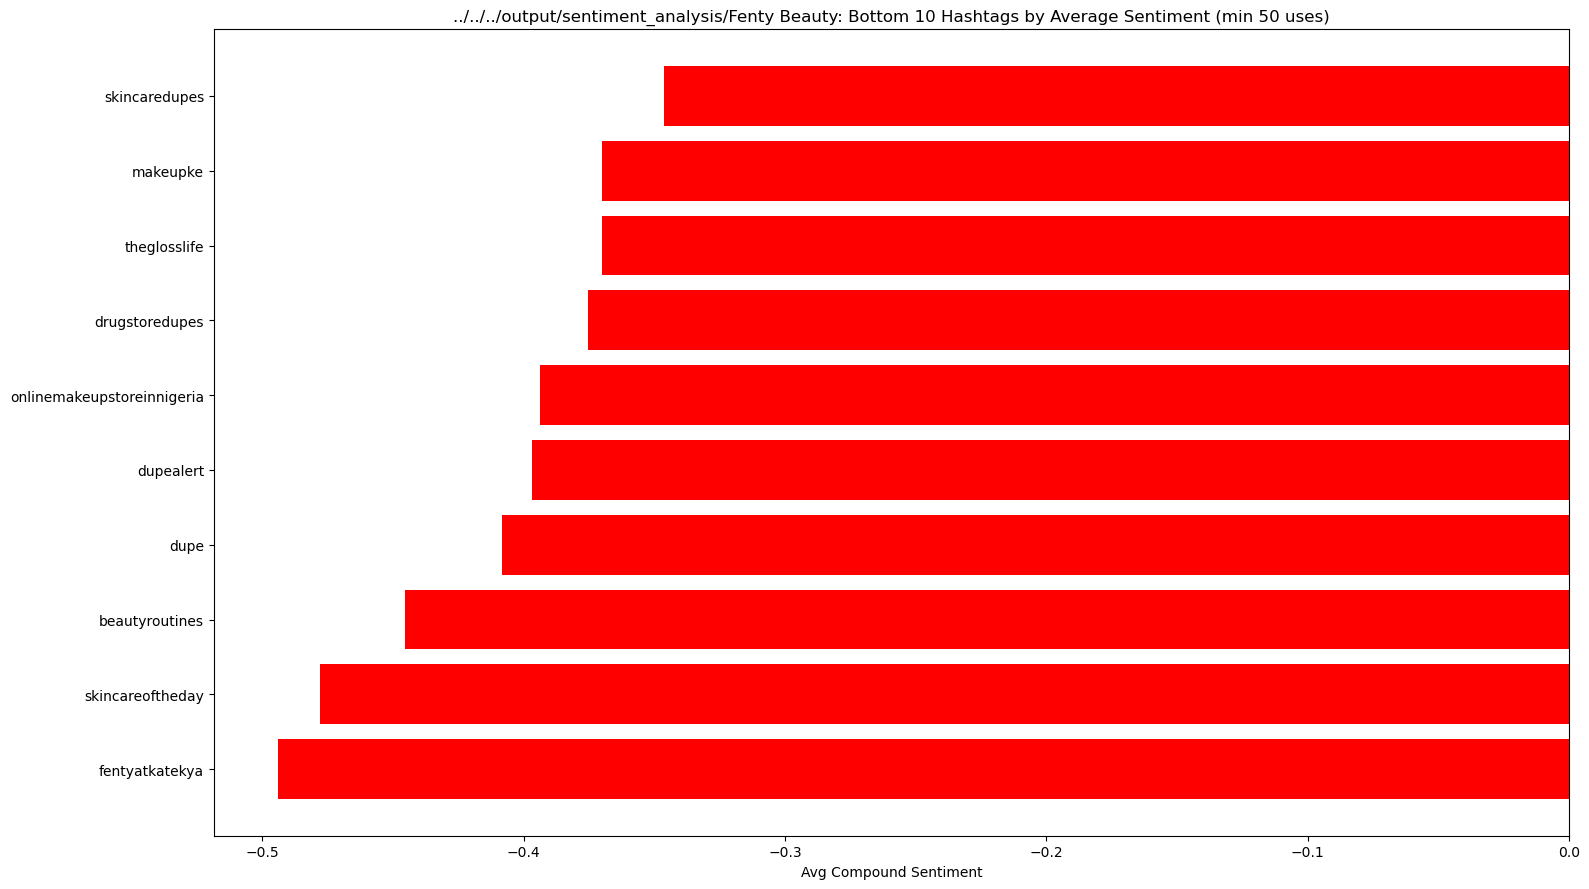

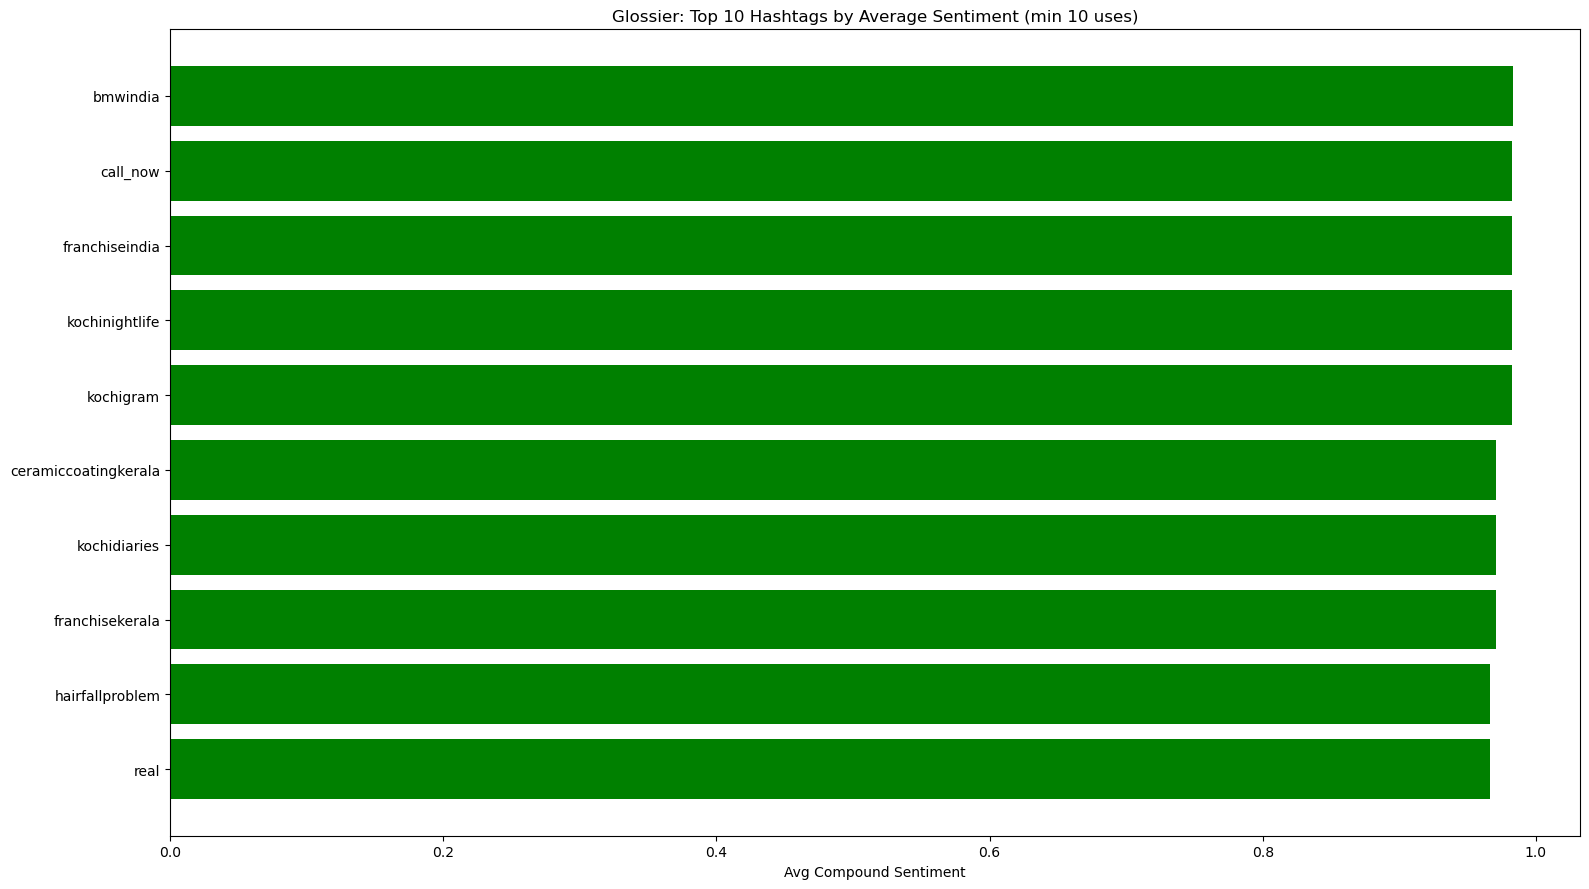

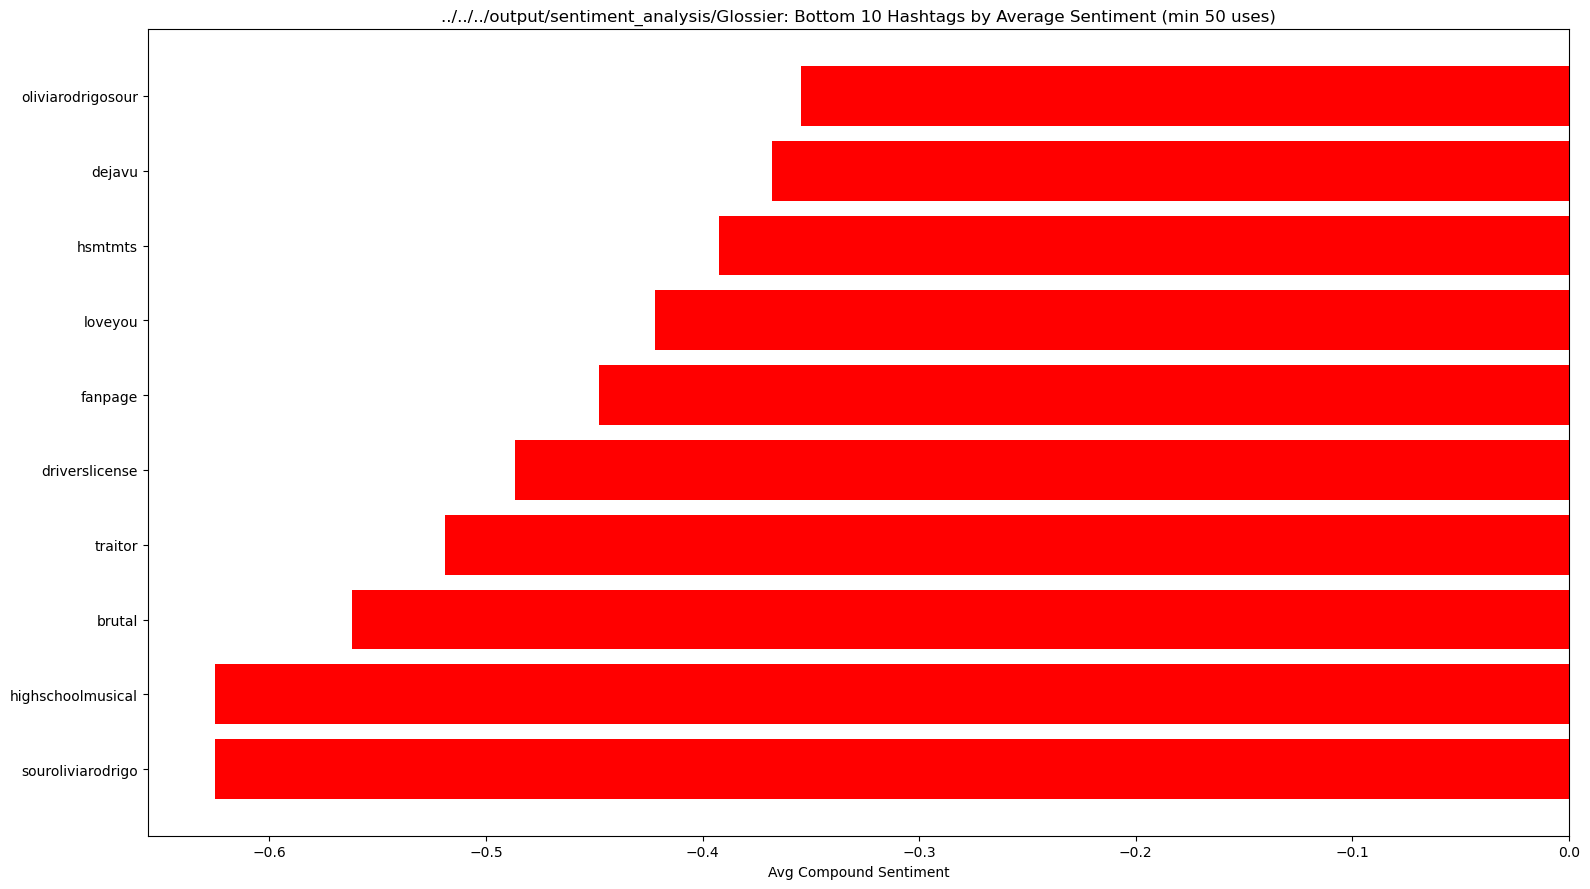

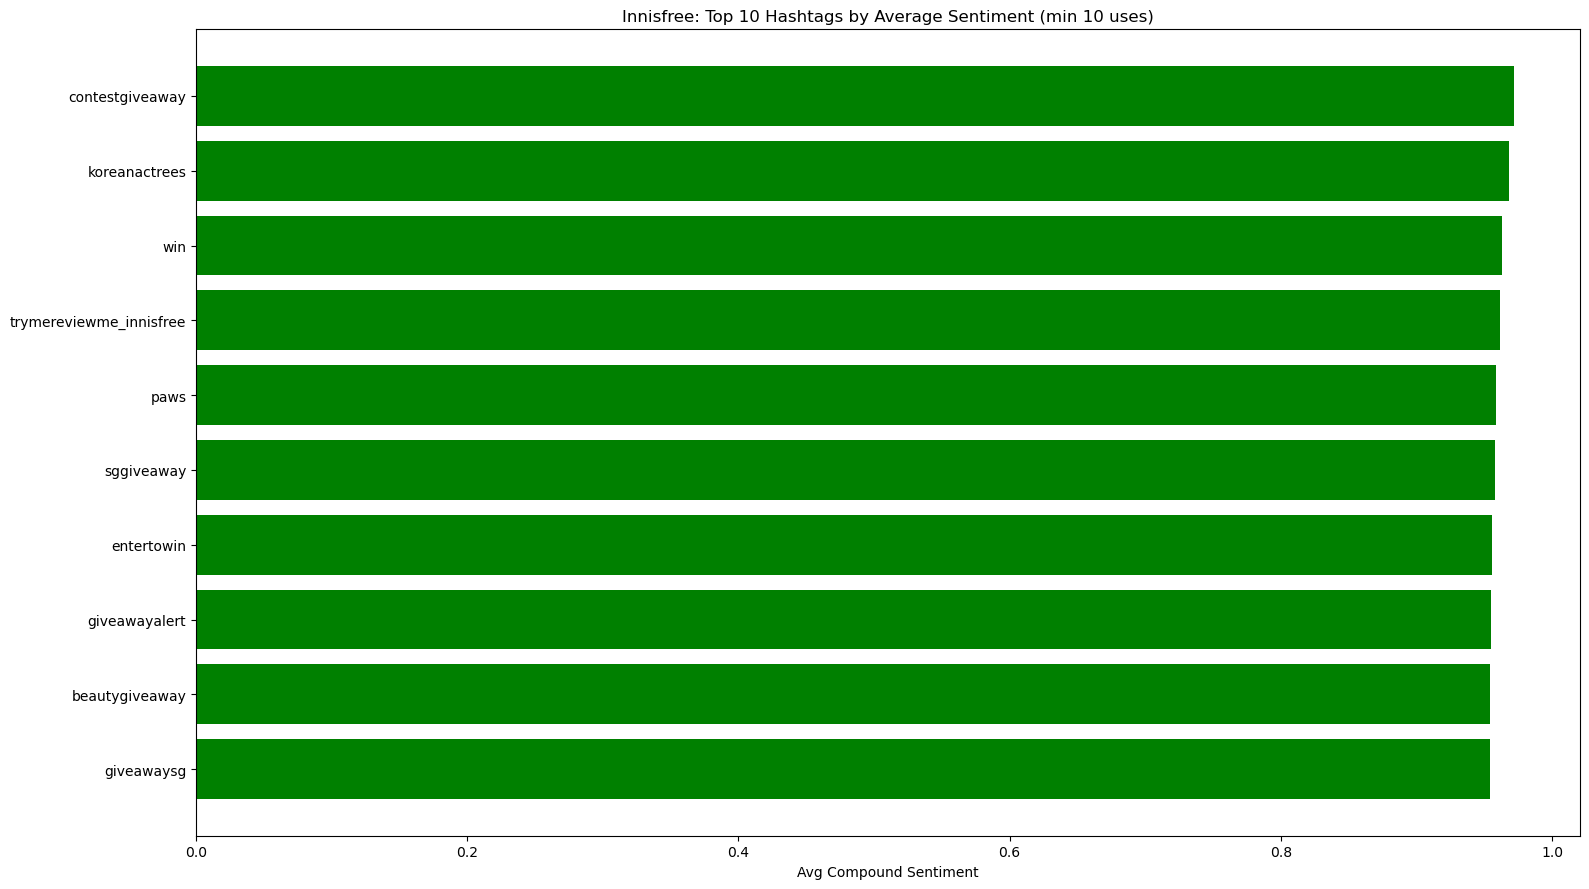

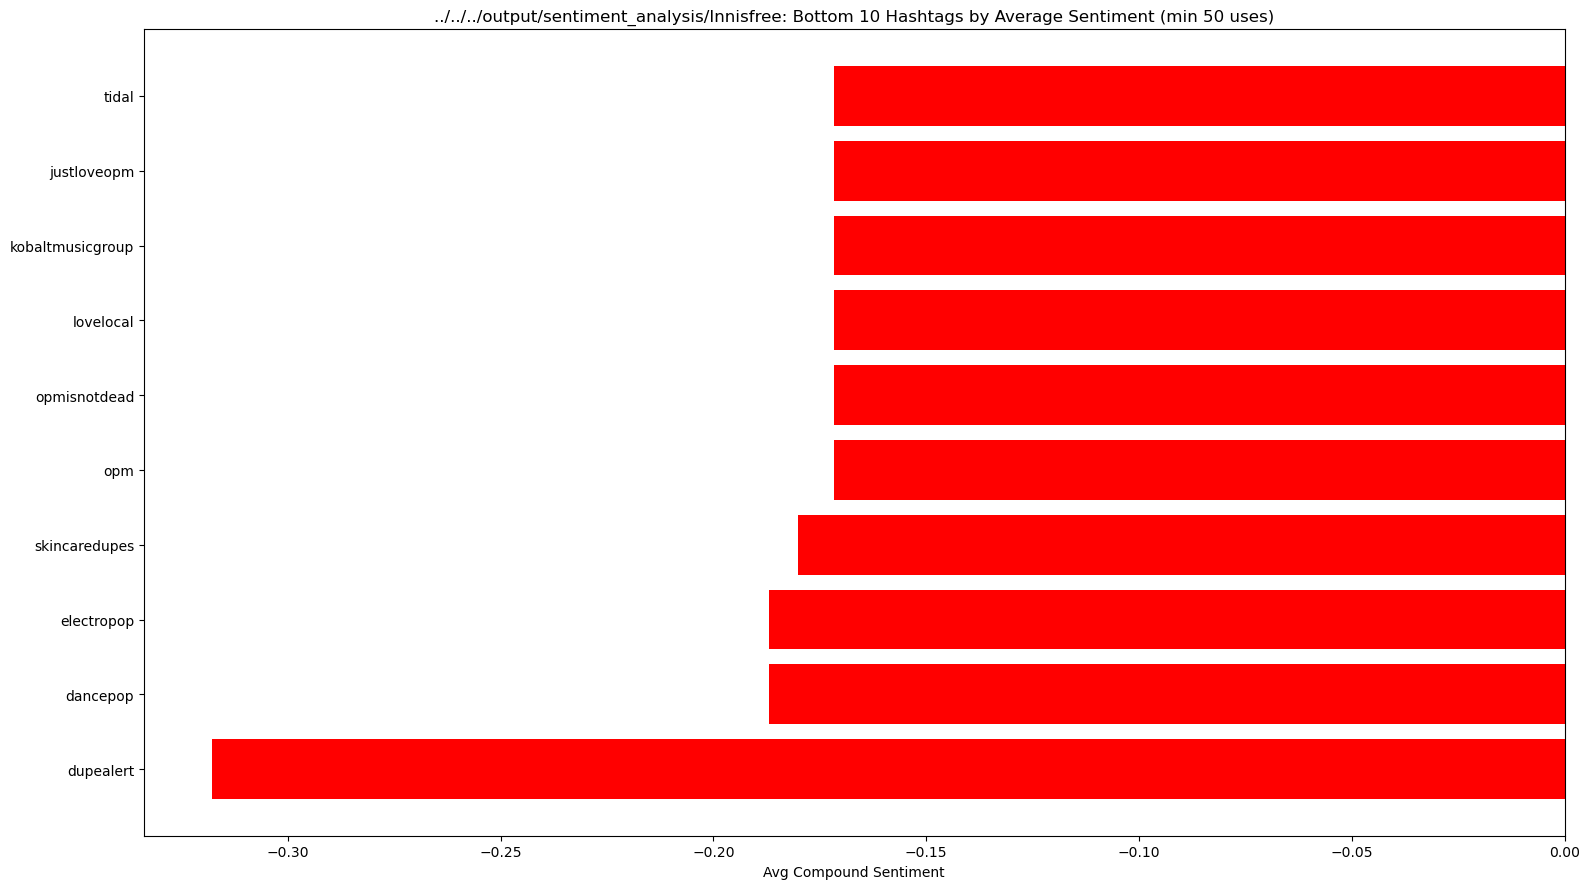

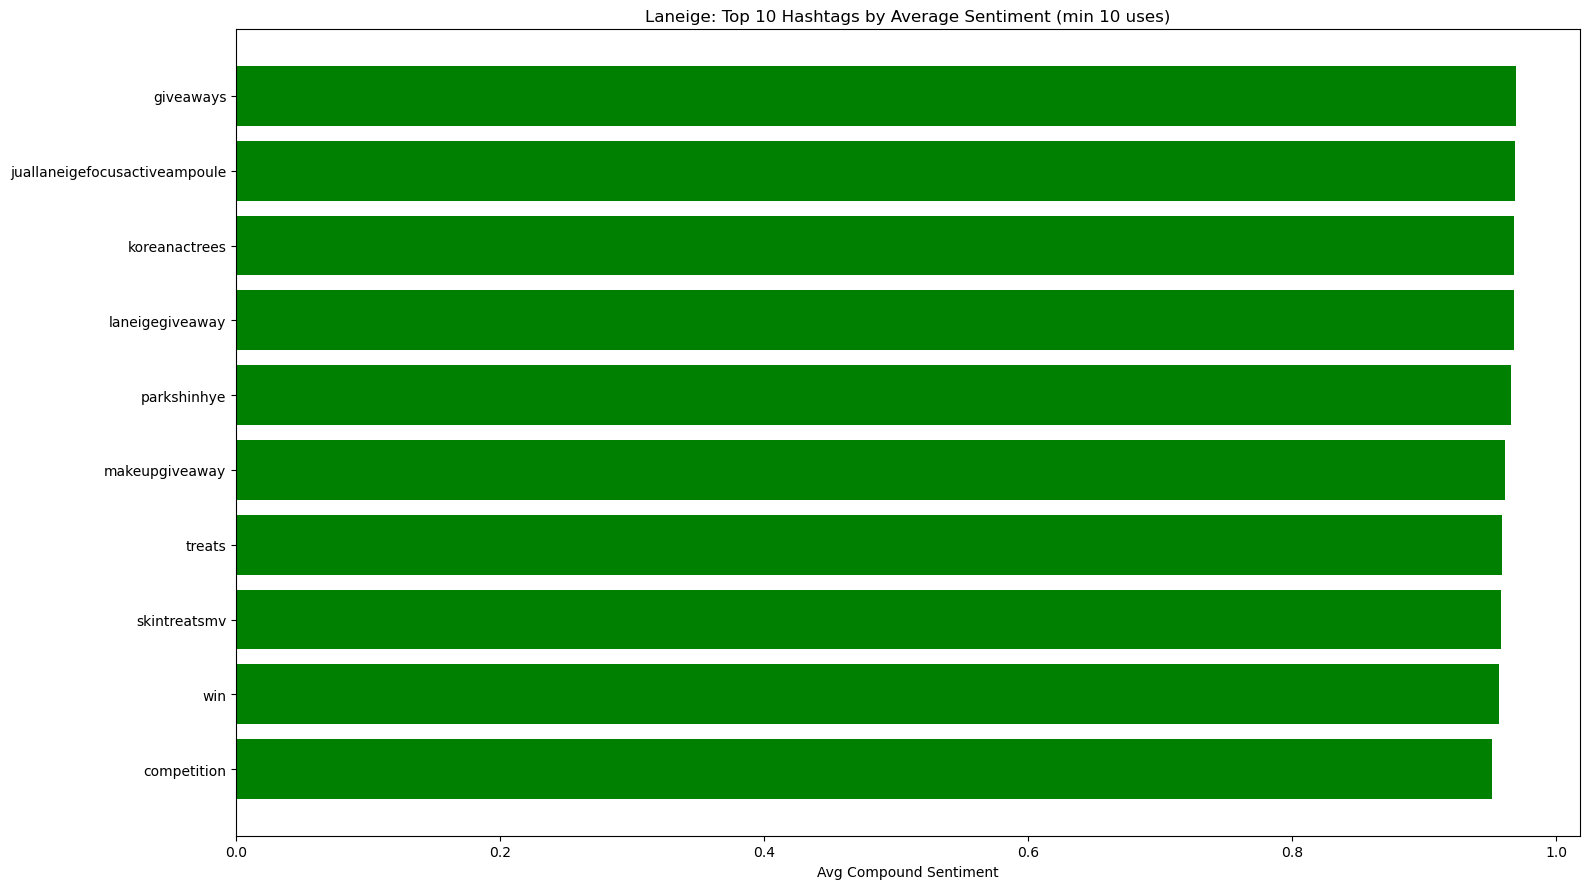

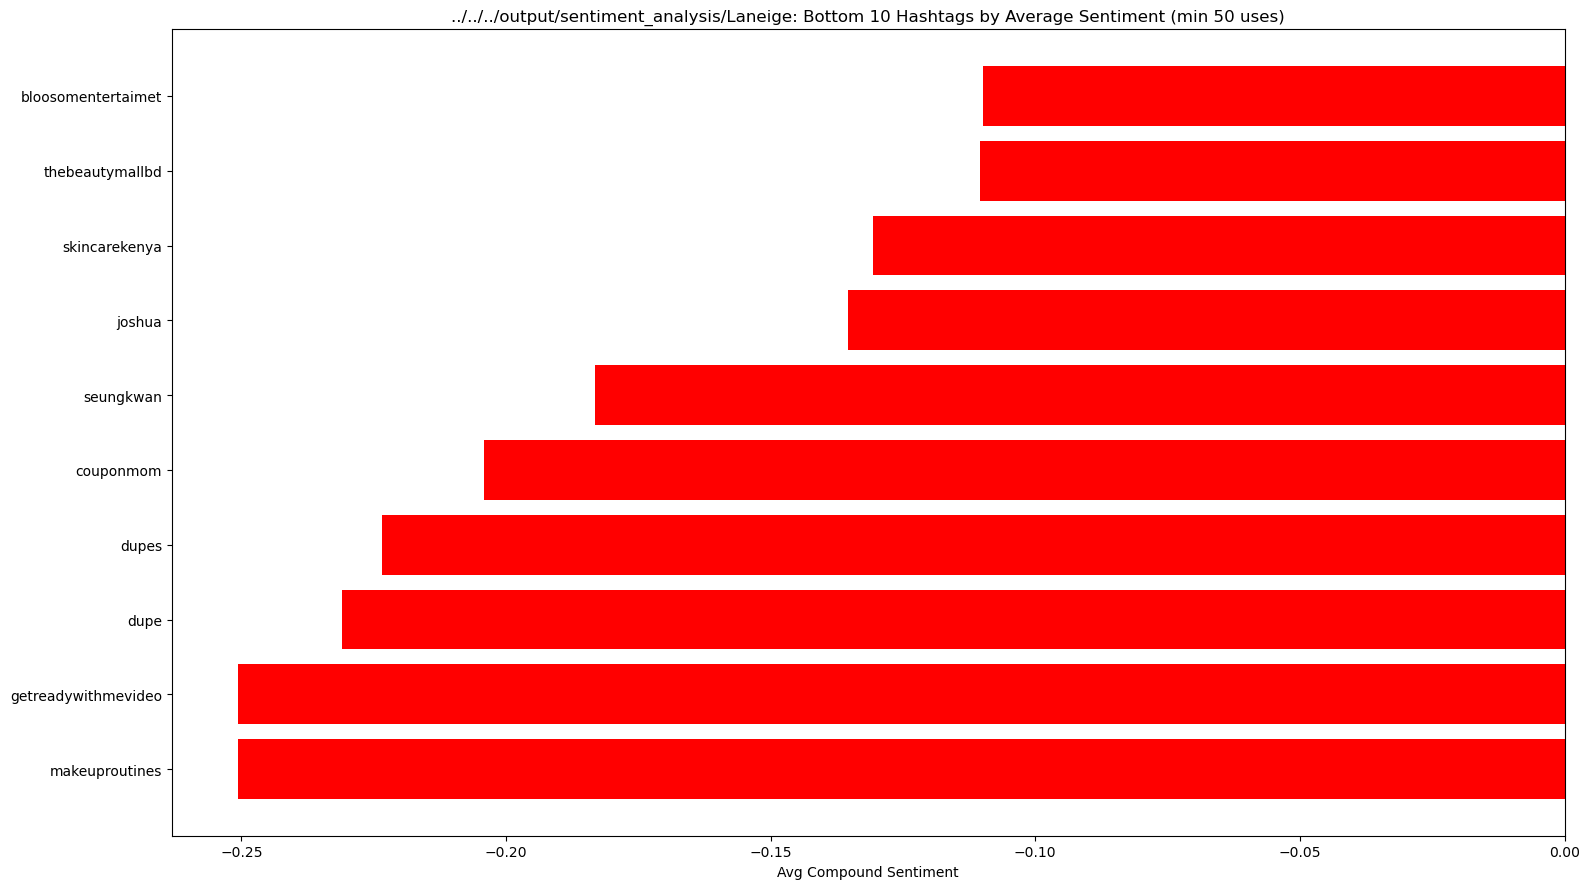

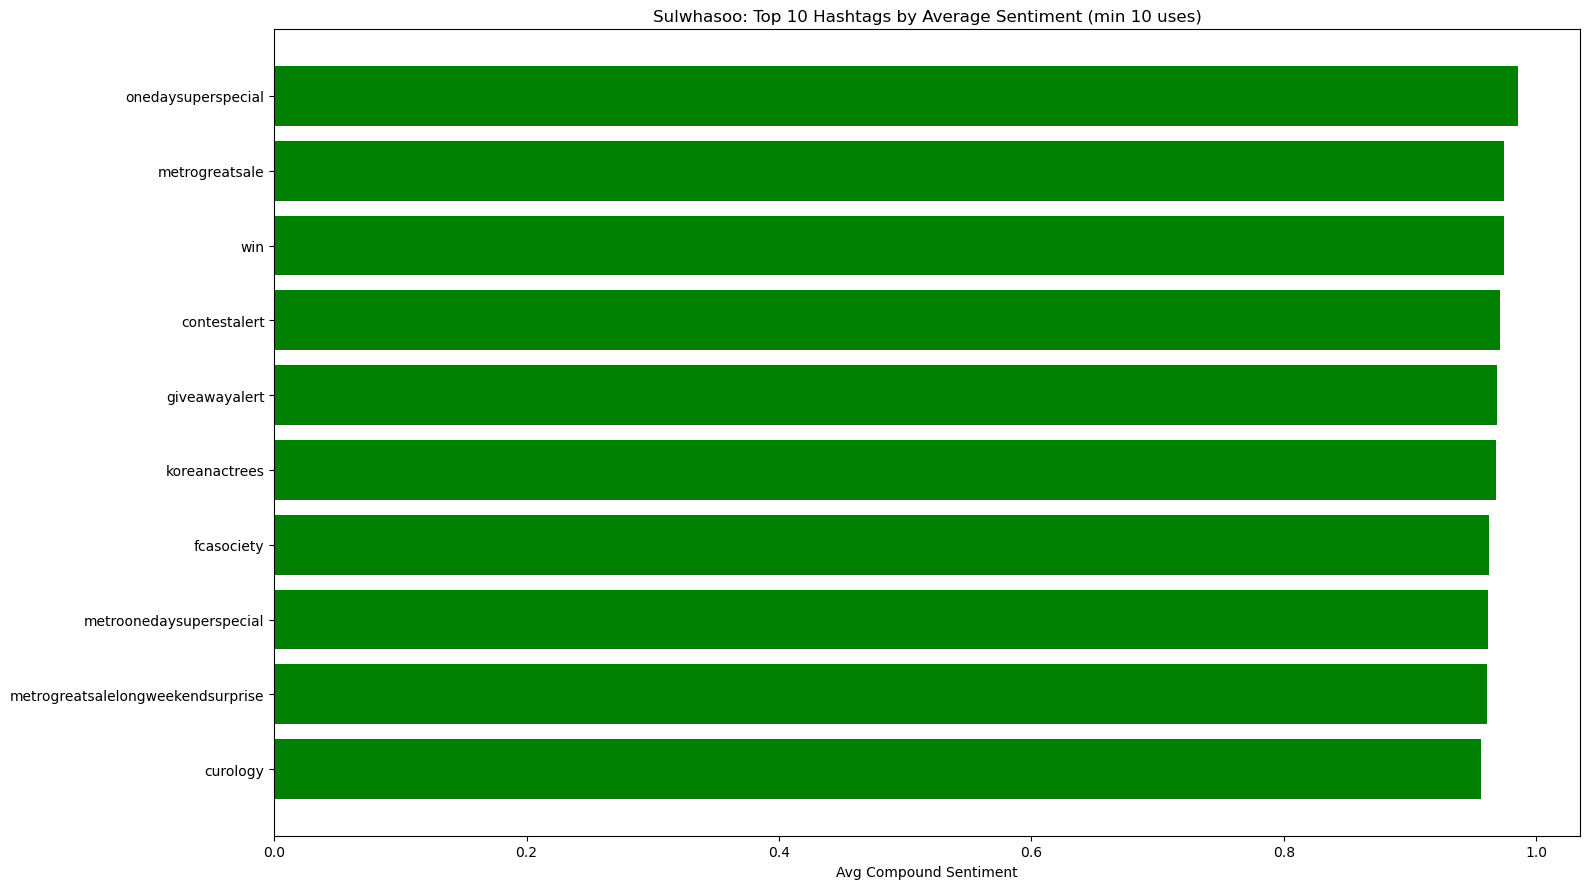

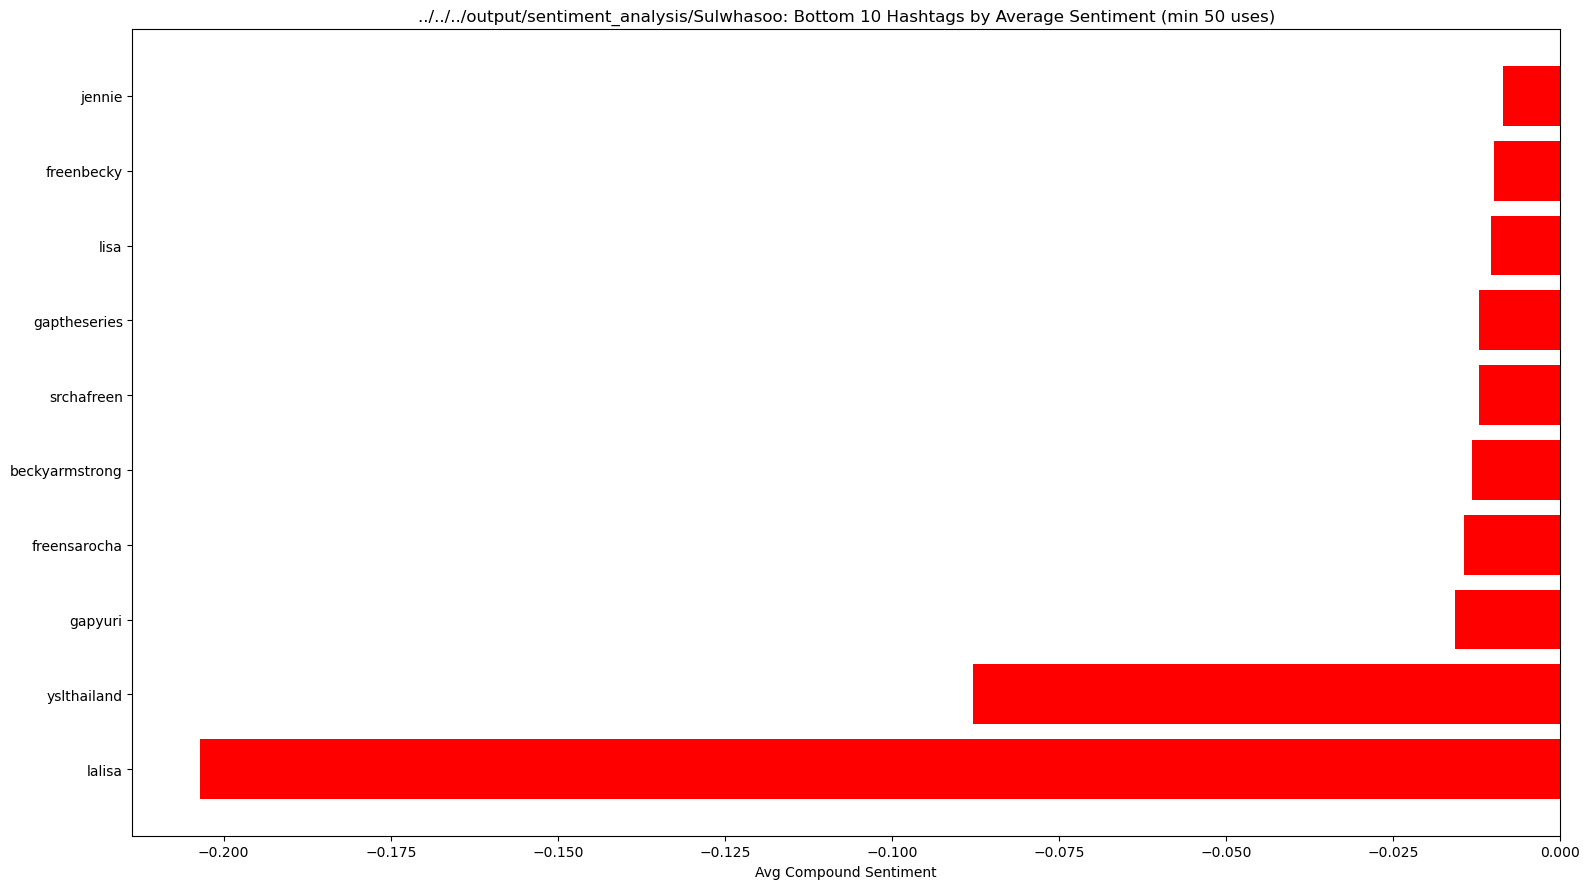

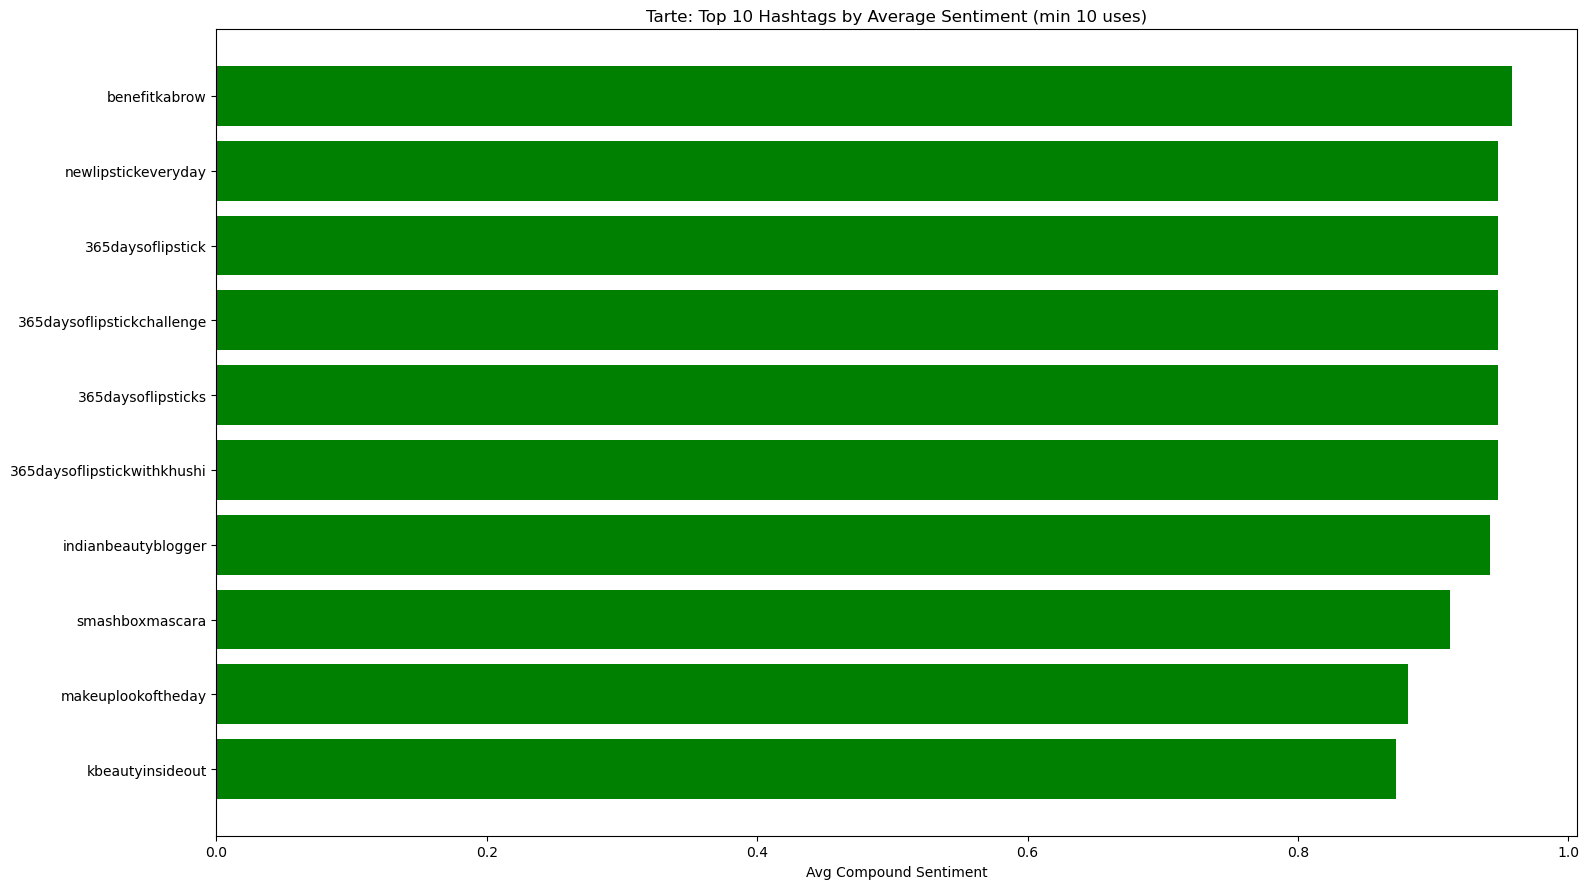

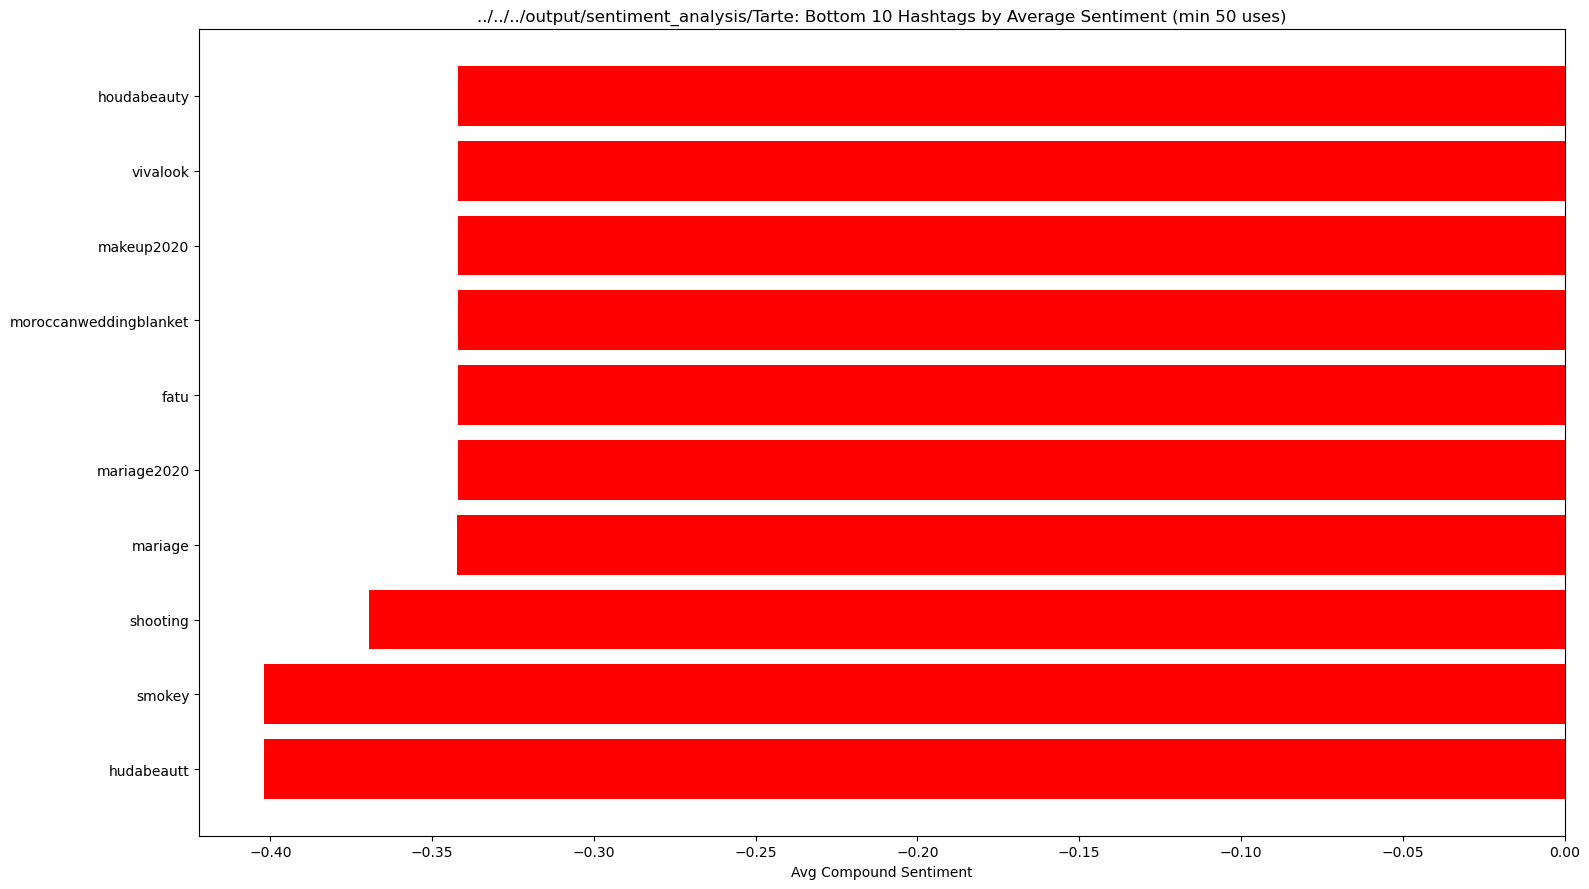

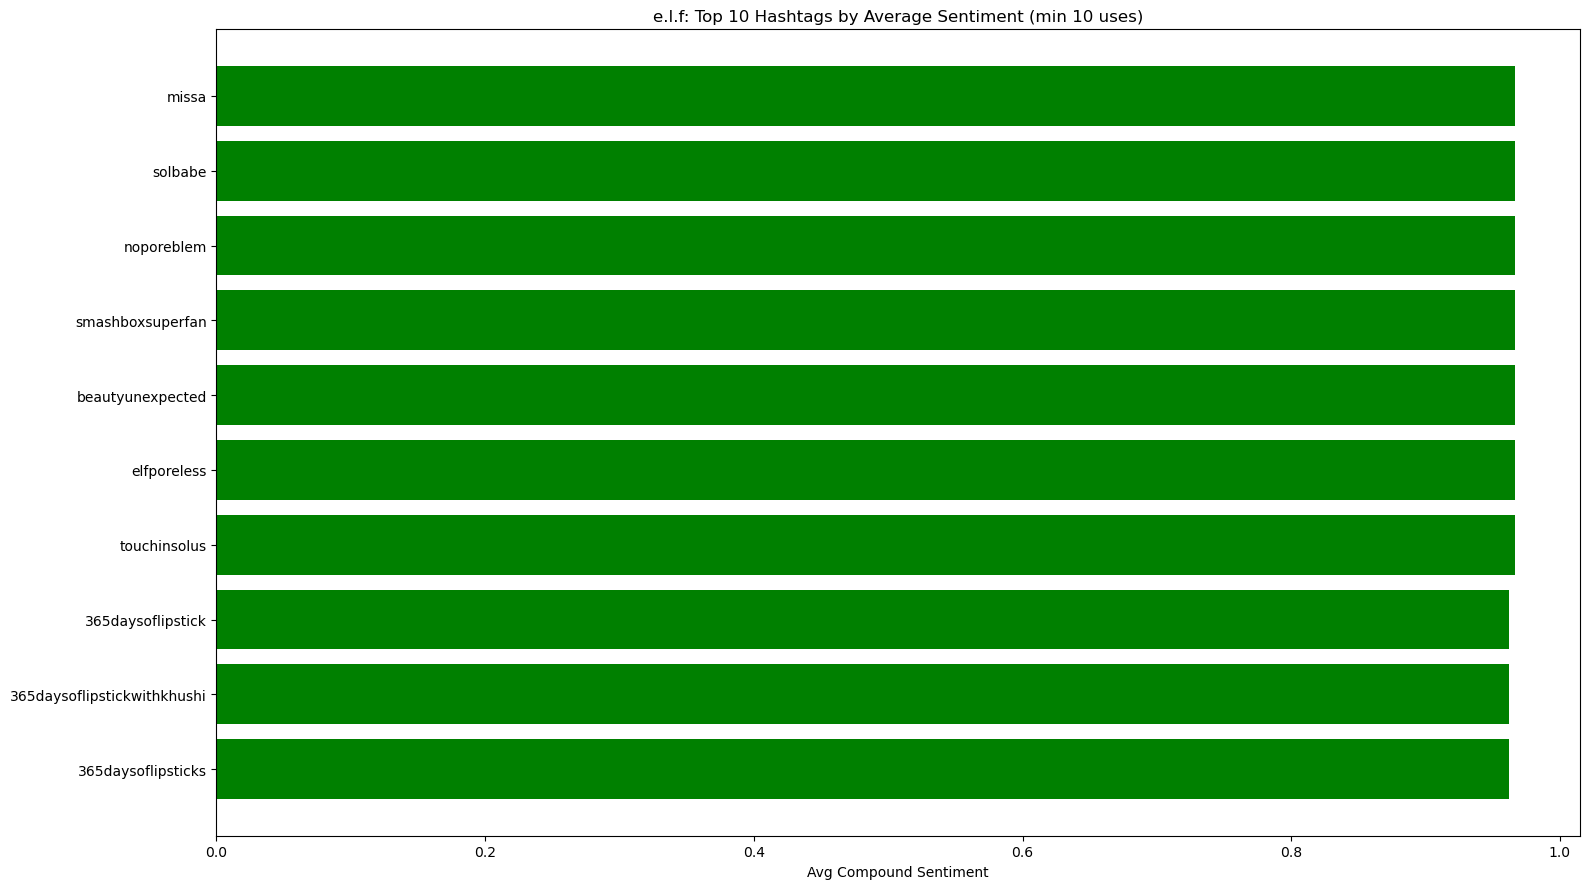

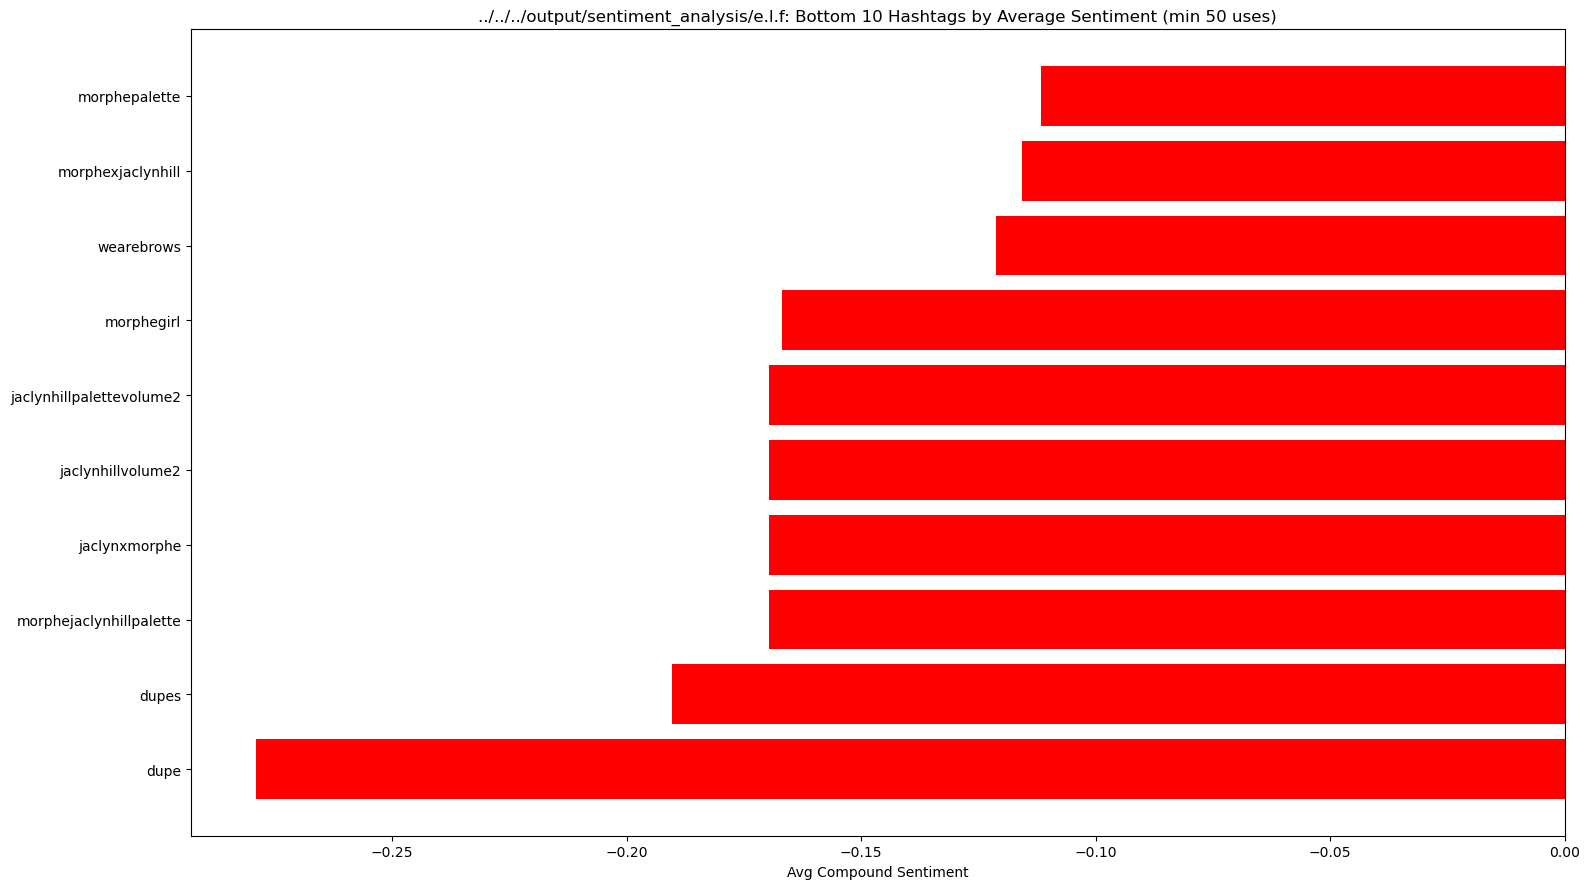

In [24]:
# Loop through each brand
brands = hashtag_sentiment["brand"].unique()
hashtag_sentiment["hashtags"] = hashtag_sentiment["hashtags"].astype(str)
hashtag_sentiment = hashtag_sentiment[
    hashtag_sentiment["hashtags"].apply(lambda x: all(char in string.printable for char in x))
]

for brand in brands:
    # Filter sentiment data to current brand
    filtered = hashtag_sentiment[hashtag_sentiment["brand"] == brand]

    # Apply frequency filter: only hashtags used at least 10 times
    filtered = filtered[filtered["count"] >= 10]

    # Sort by average sentiment
    filtered = filtered.sort_values("avg_sentiment", ascending=False)

    # Skip brands with fewer than 10 qualifying hashtags
    if len(filtered) < 10:
        continue

    top10 = filtered.head(10)
    bottom10 = filtered.tail(10)

    # Top 10 Hashtags
    plt.figure(figsize=(16, 9))
    plt.barh(top10["hashtags"], top10["avg_sentiment"], color="green")
    plt.title(f"{brand}: Top 10 Hashtags by Average Sentiment (min 10 uses)")
    plt.xlabel("Avg Compound Sentiment")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(output_path + f"{brand}_top10_sentiment.png", dpi=300, bbox_inches='tight')

    # Bottom 10 Hashtags
    plt.figure(figsize=(16, 9))
    plt.barh(bottom10["hashtags"], bottom10["avg_sentiment"], color="red")
    plt.title( output_path + f"{brand}: Bottom 10 Hashtags by Average Sentiment (min 50 uses)")
    plt.xlabel("Avg Compound Sentiment")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(output_path + f"{brand}_bottom10_sentiment.png", dpi=300, bbox_inches='tight')


In [25]:
pd.set_option('display.max_colwidth', None)     # show full text, not truncated
pd.set_option('display.max_rows', 50)           # increase number of rows shown
pd.set_option('display.max_columns', None)      # if you want to see all columns too

olivia_df = hashtag_df[hashtag_df["hashtags"].str.contains("olivia|rodrigo|brutal|driverslicense", na=False)]
neg_olivia_df = olivia_df[olivia_df["compound"] < 0][["text", "compound"]]
neg_olivia_df

,text,compound
8721,Elizabeth Hurley looked beautiful in Alice + Olivia whilst lighting up the The Empire State Building in pink in honor of The Estée Lauder Companies’ Breast Cancer Campaign’s 30th Anniversary in New York.\n\nMakeup by Sandy Linter and hair by Bradley Irion 💕\n\n@elizabethhurley1 @aliceandolivia @sandylinter <redacted_mention> #elizabethhurley #aliceandolivia #sandylintermakeup💄 #bradleyirion #redcarpet #bestdressed #beauty #beautyblogger #bbloggers #makeup #faceoftheday #lookoftheday #lotd #hair #instaglam #instagood #instalike #instafollow #instadaily #instabeauty #instamakeup #instafashion #celebrity #justbecause #justbecauseitsbeauty,-0.2960
62676,{NEW} Olivia Rodrigo via Glossier’s TikTok!\n——————————-\n#oliviarodrigo #sour #driverslicense #traitor #dejavu #good4u #brutal #hsmtmts #omgpage,-0.6249
62676,{NEW} Olivia Rodrigo via Glossier’s TikTok!\n——————————-\n#oliviarodrigo #sour #driverslicense #traitor #dejavu #good4u #brutal #hsmtmts #omgpage,-0.6249
62676,{NEW} Olivia Rodrigo via Glossier’s TikTok!\n——————————-\n#oliviarodrigo #sour #driverslicense #traitor #dejavu #good4u #brutal #hsmtmts #omgpage,-0.6249
62705,I CANT WAIT TO COP HER @glossier COLLECTION!! DROPS TOMORROW!,-0.2732
...,...,...
64974,{NEW} New photo of Olivia Rodrigo getting ready last night via @Glossier!\n——————————-\n#oliviarodrigo #sour #driverslicense #traitor #dejavu #good4u #brutal #hsmtmts #OmgPage,-0.6249
64974,{NEW} New photo of Olivia Rodrigo getting ready last night via @Glossier!\n——————————-\n#oliviarodrigo #sour #driverslicense #traitor #dejavu #good4u #brutal #hsmtmts #OmgPage,-0.6249
71634,What’s inside of my @mountlai skincare fridge ❄️ (also I can’t get this song out of my head LOL),-0.3252
91928,"Just me, doing my best to avoid seasonal depression 😂",-0.6597


In [26]:
pd.set_option('display.max_colwidth', None)     # show full text, not truncated
pd.set_option('display.max_rows', 50)           # increase number of rows shown
pd.set_option('display.max_columns', None)      # if you want to see all columns too

lisa_df = hashtag_df[hashtag_df["hashtags"].str.contains("lalisa|jennie", na=False)]
neg_lisa_df = lisa_df[lisa_df["compound"] < 0][["text", "compound"]]
neg_lisa_df

,text,compound
34164,Make up INSPO💄 from Lisa taken through her single LALISA😏❤️⁠⠀\n⁠⠀\nHOT PINK LOOK⁠⠀\n⁠⠀\nStep 1. Apply [Canmake - Perfect Stylist Eyes (Gateau Framboise) 🔎 “1073924019”] on the upper + lower lids: using “Base” color on the inner lower lids⁠⠀\nStep 2. Continue with the [Kose - Visee Color Impact Liquid Liner 0.4ml (Pink) 🔎 “1076531448”] eyeliner in the inner corners⁠⠀\nStep 3. Add a pop of color with [The Saem - Saemmul Serum Lip Gloss (Hot Pink) 🔎 “1057004421”] on your lips⁠⠀\n⁠⠀\nGLITTERY SILVER LOOK⁠⠀\n⁠⠀\nStep 1. Apply a thick layer of [innisfree - Twinkle Glitter (Silver) 🔎 “1063305933”] on your top lids with a high wing⁠⠀\nStep 2. Follow with [MACQUEEN - Waterproof Pen Eyeliner (Deep Black) 🔎 “1048634893”] on your top lids + inner lower corner ⁠⠀\nStep 3. Finalize with a pair of [Mogugu - False Lashes (3 Pairs) 🔎 “1050983884”] to add definition ⁠⠀\nStep 4. Lastly add [NAKEUP FACE - C-Cup Deep Volume Lip Tox (Ballerina Pink) 🔎 “1072702591”] to complete the look⁠⠀\n⁠⠀\nDARK BROWN + PURPLE EYESHADOW LOOK⁠⠀\n⁠⠀\nStep 1. Apply [Peach C - Falling in Eyeshadow Palette (Falling in Brown) 🔎 “1071720049”] on the top of the lids⁠⠀\nStep 2. Followed by [Kose - Visee Crayon Eye Color (Mode Purple) 🔎 “1076592568”] on the lower lash line⁠⠀\nStep 3. Add [ISEHAN - Kiss Me Heroine Make Smooth Liquid Eyeliner (Black) 🔎 “1073385839”] as your eyeliner⁠⠀\nStep 4. Finish up with [NAMING - Melting Glow Lipstick (Your Red) 🔎 “1087536257”] ⁠⠀\n⁠⠀\n❤️⁠⠀\n⁠⠀\n#yesstyle #yesstyler #makeupguide #makeup #beauty #kpop #lalisa ⁠⠀,-0.5859
122421,"Rosé for Sulwhasoo\n\n. \n. \nFollow to be able to comment\n. \n(All comments that I deem disrespectful will be deleted. Some accounts may also be blocked. If any problems or fights are created, I will also delete the comments. If you consider that any comment is problematic you can tell me by dm) \n. \n(IF YOU WANT TO USE MY POSTS PLEASE GIVE ME THE CREDIT)\n.\n. \n.\n#BLACKPINK #lalisa #Jisoo #Lisa #Rosé #Jennie #블랙핀크 #지수 #제니 #로제 #리사",-0.7964
122421,"Rosé for Sulwhasoo\n\n. \n. \nFollow to be able to comment\n. \n(All comments that I deem disrespectful will be deleted. Some accounts may also be blocked. If any problems or fights are created, I will also delete the comments. If you consider that any comment is problematic you can tell me by dm) \n. \n(IF YOU WANT TO USE MY POSTS PLEASE GIVE ME THE CREDIT)\n.\n. \n.\n#BLACKPINK #lalisa #Jisoo #Lisa #Rosé #Jennie #블랙핀크 #지수 #제니 #로제 #리사",-0.7964
122610,"ROSÉ at the SULWHASOO INSAMJANG POP-UP Store \n\n. \n. \nFollow to be able to comment\n. \n(All comments that I deem disrespectful will be deleted. Some accounts may also be blocked. If any problems or fights are created, I will also delete the comments. If you consider that any comment is problematic you can tell me by dm) \n. \n(IF YOU WANT TO USE MY POSTS PLEASE GIVE ME THE CREDIT)\n.\n. \n.\n#BLACKPINK #lalisa #Jisoo #Lisa #Rosé #Jennie #블랙핀크 #지수 #제니 #로제 #리사",-0.7964
122610,"ROSÉ at the SULWHASOO INSAMJANG POP-UP Store \n\n. \n. \nFollow to be able to comment\n. \n(All comments that I deem disrespectful will be deleted. Some accounts may also be blocked. If any problems or fights are created, I will also delete the comments. If you consider that any comment is problematic you can tell me by dm) \n. \n(IF YOU WANT TO USE MY POSTS PLEASE GIVE ME THE CREDIT)\n.\n. \n.\n#BLACKPINK #lalisa #Jisoo #Lisa #Rosé #Jennie #블랙핀크 #지수 #제니 #로제 #리사",-0.7964
...,...,...
127592,"[220818] #ROSÉ x Sulwhasoo 👀.\n\n“Does anyone look familiar? most exclusive news to give a hint with the launch of the new representative of the ginseng skincare brand Sulwhasoo that would rock the world class industry! … I bring the pain like! #PinkVenom”\n\n📍Sulwhasoo is a highly respected luxury Korean beauty brand that's been churning out innovative, best-selling skincare products since the 1960s.\n-------------------------------------------------------------------\n~\n~\n~\n🖤~Follow @_rosie_are_rosies for more~🖤\n------------------

## LDA

In [27]:
## function provided
def create_dtm(list_of_strings, metadata):
    """ 
    Function to create dense document-term matrix (DTM) from a list of strings and provided metadata. 
    A sparse DTM is a list of term_index/doc_index tuples: if a given term occurs in a given doc at least once, 
        then this count is listed as a tuple; if not, that term/doc pair is omitted. 
    In a dense DTM, each row is one text (e.g., an Airbnb listing), each column is a term, and 
        each cell indicates the frequency of that word in that text. 
    
    Parameters:
        list_of_strings (Series): each row contains a preprocessed string (need not be tokenized)
        metadata (DataFrame): contains document-level covariates
    
    Returns:
        Dense DTM with metadata on left and then one column per word in lexicon
    """
    
    # initialize a sklearn tokenizer; this helps us tokenize the preprocessed string input
    vectorizer = CountVectorizer(lowercase = True, max_features=5000, min_df=5,           # ignore rare words
        stop_words='english')  # or try 10000 if you can afford more memory) 
    dtm_sparse = vectorizer.fit_transform(list_of_strings)
    print('Sparse matrix form:\n', dtm_sparse[:3]) # take a look at sparse representation
    print()
    
    # switch the dataframe from the sparse representation to the normal dense representation (so we can treat it as regular dataframe)
    dtm_dense_named = pd.DataFrame(dtm_sparse.todense(), columns=vectorizer.get_feature_names_out ())
    print('Dense matrix form:\n', dtm_dense_named.head()) # take a look at dense representation
    dtm_dense_named_withid = pd.concat([metadata.reset_index(drop=True), dtm_dense_named], axis = 1) # add back document-level covariates

    return(dtm_dense_named_withid)

In [28]:
all_df["text_clean_str"] = all_df["text_clean"].apply(
    lambda tokens: " ".join(tokens) if isinstance(tokens, list) else str(tokens)
)


In [29]:
sample_df = all_df.sample(1000, random_state=42)
dtm_nopre = create_dtm(
    list_of_strings=sample_df["text_clean_str"].fillna(""),  # Replace NaN with empty string
    metadata=sample_df[["is_branded_content", "hashtags", "post_owner.name"]]
)

Sparse matrix form:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 46 stored elements and shape (3, 1449)>
  Coords	Values
  (0, 943)	1
  (0, 1026)	1
  (0, 281)	1
  (0, 598)	1
  (0, 1177)	1
  (0, 463)	2
  (0, 1218)	1
  (0, 263)	2
  (0, 130)	1
  (0, 533)	1
  (0, 299)	1
  (0, 1012)	1
  (0, 1112)	1
  (0, 189)	1
  (0, 1286)	1
  (0, 210)	1
  (0, 18)	2
  (1, 475)	1
  (1, 311)	1
  (1, 223)	1
  (2, 263)	1
  (2, 1134)	1
  (2, 1058)	1
  (2, 821)	1
  (2, 837)	1
  (2, 380)	1
  (2, 1339)	7
  (2, 329)	1
  (2, 914)	2
  (2, 137)	1
  (2, 926)	2
  (2, 471)	1
  (2, 681)	1
  (2, 1165)	1
  (2, 984)	1
  (2, 1124)	1
  (2, 787)	1
  (2, 752)	1
  (2, 442)	1
  (2, 238)	1
  (2, 433)	1
  (2, 156)	2
  (2, 313)	1
  (2, 279)	1
  (2, 710)	1
  (2, 720)	1

Dense matrix form:
    abcommun  abh  abl  absolut  absorb  accord  achiev  acid  acn  acnepron  \
0         0    0    0        0       0       0       0     0    0         0   
1         0    0    0        0       0       0       0     0    0         0 

In [30]:
## show first set of rows/cols
dtm_nopre.head()

## show arbitrary later cols in resulting data
dtm_nopre.shape
dtm_nopre.iloc[0:5, 480:500]

,is_branded_content,hashtags,post_owner.name,abcommun,abh,abl,absolut,absorb,accord,achiev,acid,acn,acnepron,activ,actual,ad,add,addit,address,advanc,advancednightrepair,aesthet,affili,afford,affordableskincar,age,ago,aha,ahabha,air,airbrush,airi,akaimethod,alert,allow,alo,alreadi,alway,amazon,ampoul,anastasia,anastasiabeverlyhil,angel,anniversari,announc,anoth,anti,antiag,antioxid,anyon,anyth,app,appear,appl,appli,applic,appreci,aqua,area,armanibeauti,arriv,art,artist,asianbeauti,asianskincar,asiatica,ask,asmr,atau,atl,atlanta,authent,author,avenu,avoid,award,away,awesom,axisi,babi,backstag,bad,badgalriri,bag,bake,balanc,balm,bank,barrier,base,basic,beam,bearkpopstor,beauti,beautyaddict,beautyblend,beautyblogg,beautycar,beautycommun,beautyhack,beautyofjoseon,beautyproduct,beautyroutin,beautytip,becca,beccacosmet,becom,beconfid,begin,beginn,beig,believ,benefit,benefitcosmet,benton,berri,besti,bestsel,better,bha,big,biggest,birthday,bit,bksstore,black,blackhead,blemish,blend,bless,blogger,blue,blur,blush,bobbi,bold,bomb,book,boost,booster,born,botan,bottl,bought,bounc,bounci,boutiqu,box,boy,brand,break,breakout,breyle,bright,brighten,brighter,bring,bronz,bronzer,brow,brown,brush,bt,bubbl,build,busi,butter,calm,came,campaign,candi,capsul,card,care,cart,case,categori,caudali,caus,celebr,cell,centella,center,ceram,ceramid,cerav,certifi,challeng,champagn,chanc,chanel,chang,charlott,charlottetilburi,chaumet,chava,cheapiteam,checkout,cheek,cheeki,cherri,chocol,choic,choos,christma,cica,circl,citi,clarifi,clarin,class,classic,clay,clean,cleans,cleanser,clear,cliniqu,clog,close,cloud,code,cold,colgat,collagen,collect,color,colour,colourpop,colourpopcosmet,combin,combo,come,comfort,commun,compact,compani,compar,complet,complex,complexion,conceal,concentr,concern,condit,confid,confidentinmylif,consist,contact,contain,content,continu,contour,control,cool,cooper,corner,correct,cosmet,cosrxskincar,cotton,counter,coupl,cours,cover,coverag,cream,creami,creat,creativ,credit,creme,crest,crueltyfre,cultur,curl,current,cushion,custom,cute,daili,damag,dark,date,day,dead,deal,dear,decay,decemb,deep,deepli,deet,definit,dehydr,delight,deliv,deliveri,deserv,design,develop,dew,dewi,diamond,didnt,differ,dikalu,dior,diorbeauti,dip,direct,dirt,discov,doesnt,dont,dose,doubl,doublewear,draw,dream,dress,dri,drink,drip,drive,drop,drunkeleph,dryness,dubai,dull,duo,dupe,dust,ear,earli,easi,easili,eboni,edit,editorialmakeup,educ,effect,elast,elemi,elfcosmet,elfcosmeticsuk,els,email,embrac,empti,end,energi,enhanc,enjoy,enrich,ensur,entir,especi,essenc,essenti,esteelaud,esteepartn,esté,etudehous,event,everi,everyday,everyth,excess,excit,exclus,exfoli,exist,expect,expens,experi,explor,exploremor,explorepag,extens,extra,extract,extrem,eye,eyebrow,eyelash,eyelin,eyeshadow,face,facebook,facemask,facial,fade,fall,famili,famou,fan,far,fashion,fashionblogg,fast,fav,fave,favorit,favourit,featur,februari,feel,feeltheglow,felt,fendi,fentybeauti,fentybeautybyrihanna,fentyfac,fentyskin,festiv,fight,film,filter,final,fine,finish,firm,firmer,fit,fix,flash,flavor,flavour,flawless,fli,flick,flight,floor,flower,fluid,flush,foam,follow,followm,food,forev,forget,formul,forward,foundat,fragranc,freepost,freestyl,fresh,freshbeauti,friday,friend,friendli,fun,futur,fyp,game,gel,gener,gentl,gentli,gettheglow,getyour,gift,ginseng,girl,girli,gisou,glam,glammakeup,glamour,glass,glassskin,glide,glitter,glittermakeup,global,gloss,glossbomb,glossi,glossylip,glow,glowi,glowingskin,glowrecip,glowyskin,goal,goe,gogotal,gold,golden,good,goodi,goodqualityonlineshop,gorgeou,goto,grab,grail,great,green,grip,ground,grwm,guicami,guid,haha,hair,haircar,hairstyl,hallyustar,hand,happen,happi,hard,hate,haul,havent,head,heal,health,healthi,healthier,healthyglow,healthyskin,heard,heart,heat,heavi,help,hengfang,heritag,hero,herorang,high,highli,highlight,highlit,histori,hit,hold,holdliv,holi,holiday,holisticbeauti,home,honest,honey,hope,host,hot,hour,hourglasscosmet,hous,huda,hudabeauti,huddabeauti,huge,humid

(1000, 1452)

,glossi,glossylip,glow,glowi,glowingskin,glowrecip,glowyskin,goal,goe,gogotal,gold,golden,good,goodi,goodqualityonlineshop,gorgeou,goto,grab,grail,great
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
top_terms = dtm_nopre[dtm_nopre.columns[4:]].sum(axis = 0)

## sorting from most frequent to least frequent
top_terms.sort_values(ascending = False)

lip                343
cream              296
serum              228
hydrat             225
eye                167
                  ... 
transit              5
harm                 5
cast                 5
cash                 5
lipsleepingmask      5
Length: 1542, dtype: int64

In [31]:
## Step 1: re-tokenize and store in list
## here, i'm doing with the raw random sample of text
## in activity, you should do with the preprocessed texts
text_raw_tokens = [wordpunct_tokenize(one_text) for one_text in 
                  all_df.text_clean_str]


## Step 2: use gensim create dictionary - gets all unique words across documents
text_raw_dict = corpora.Dictionary(text_raw_tokens)
raw_len = len(text_raw_dict) # get length for comparison below

### explore first few keys and values
### see that key is just an arbitrary counter; value is the word itself
{k: text_raw_dict[k] for k in list(text_raw_dict)[:5]}


## Step 3: filter out very rare and very common words
## here, i'm using the threshold that a word needs to appear in at least
## 5% of docs but not more than 95%
## this is an integer count of docs so i round
lower_bound = round(all_df.shape[0]*0.05)
upper_bound = round(all_df.shape[0]*0.95)

### apply filtering to dictionary
text_raw_dict.filter_extremes(no_below = lower_bound,
                             no_above = upper_bound)
print(f'Filtering out very rare and very common words reduced the \
length of dictionary from {str(raw_len)} to {str(len(text_raw_dict))}.')
{k: text_raw_dict[k] for k in list(text_raw_dict)[:5]} # show first five entries after filtering

## Step 4: apply dictionary to TOKENIZED texts
## this creates a mapping between each word 
## in a specific listing and the key in the dictionary.
## for words that remain in the filtered dictionary,
## output is a list where len(list) == n documents
## and each element in the list is a list of tuples
## containing the mappings
corpus_fromdict = [text_raw_dict.doc2bow(one_text) 
                   for one_text in text_raw_tokens]

### can apply doc2bow(one_text, return_missing = True) to print words
### eliminated from the listing bc they're not in filtered dictionary.
### but feeding that one with missing values to
### the lda function can cause errors
corpus_fromdict_showmiss = [text_raw_dict.doc2bow(one_text, return_missing = True)
                            for one_text in text_raw_tokens]
print('Sample of documents represented in dictionary format (with omitted words noted):')
corpus_fromdict_showmiss[:10]

{0: "'", 1: "',", 2: "']", 3: "['", 4: 'discov'}

Filtering out very rare and very common words reduced the length of dictionary from 278109 to 64.


{0: "'", 1: "',", 2: "']", 3: "['", 4: 'esté'}

Sample of documents represented in dictionary format (with omitted words noted):


[([(0, 19), (1, 19), (2, 1), (3, 1), (4, 1), (5, 2)],
  {'discov': 1,
   'everi': 1,
   'find': 1,
   'huda': 1,
   'lux': 1,
   'luxuri': 1,
   'match': 1,
   'nar': 1,
   'nykaa': 2,
   'nykaalux': 1,
   'premium': 1,
   'readi': 1,
   'right': 1,
   'start': 1,
   'swipe': 1,
   'ysl': 1}),
 ([(0, 18), (1, 18), (2, 1), (3, 1), (4, 2), (6, 1), (7, 2)],
  {'esteelaud': 1,
   'esteelauderph': 1,
   'everi': 1,
   'flagship': 1,
   'flatter': 1,
   'go': 1,
   'lazada': 1,
   'made': 1,
   'offici': 1,
   'rosetint': 1,
   'strike': 1,
   'subtl': 1,
   'whether': 1,
   'your': 1}),
 ([(0, 88),
   (1, 88),
   (2, 1),
   (3, 1),
   (4, 1),
   (7, 2),
   (8, 2),
   (9, 1),
   (10, 1),
   (11, 1)],
  {'action': 1,
   'app': 1,
   'bacha': 1,
   'bath': 1,
   'bonu': 1,
   'boost': 1,
   'braun': 1,
   'breitl': 1,
   'bvlgari': 1,
   'büffel': 1,
   'charl': 1,
   'chaumet': 1,
   'christian': 2,
   'clarin': 1,
   'club': 1,
   'coffe': 1,
   'compani': 1,
   'complet': 1,
   'creatur': 1

In [30]:
## Step 5: we're finally ready to estimate the model!
## full documentation here - https://radimrehurek.com/gensim/models/ldamodel.html
## here, we're feeding the lda function:
## (1) the corpus we created from the dictionary,
## (2) a parameter we decide on for the number of topics (k),
## (3) the dictionary itself,
## (4) parameter for number of passes through training data (more means slower), and
## (5) parameter that returns, for each word remaining in dict, the topic probabilities.
## see documentation for many other arguments you can vary
ldamod = gensim.models.ldamodel.LdaModel(corpus_fromdict, 
                                         num_topics = 5, 
                                         id2word=text_raw_dict, 
                                         passes=6, 
                                         alpha = 'auto',
                                         per_word_topics = True)

print(type(ldamod))

<class 'gensim.models.ldamodel.LdaModel'>


In [31]:
## Post-model 1: explore corpus-wide summary of topics
### getting the topics and top words; can retrieve diff top words
topics = ldamod.print_topics(num_words = 10)
for topic in topics:
    print(topic)

(0, '0.148*"fentybeauti" + 0.131*"lip" + 0.066*"gloss" + 0.062*"palett" + 0.060*"powder" + 0.060*"set" + 0.059*"highlight" + 0.050*"conceal" + 0.048*"eye" + 0.048*"brow"')
(1, '0.095*"brand" + 0.091*"one" + 0.091*"use" + 0.089*"make" + 0.059*"time" + 0.056*"also" + 0.050*"give" + 0.049*"good" + 0.048*"look" + 0.048*"work"')
(2, '0.517*"shade" + 0.184*"foundat" + 0.162*"order" + 0.089*"natur" + 0.046*"soft" + 0.002*"esté" + 0.000*"look" + 0.000*"full" + 0.000*"fentybeauti" + 0.000*"last"')
(3, '0.445*"day" + 0.407*"beauti" + 0.147*"store" + 0.001*"esté" + 0.000*"last" + 0.000*"fentybeauti" + 0.000*"palett" + 0.000*"time" + 0.000*"make" + 0.000*"work"')
(4, '0.131*"cream" + 0.098*"hydrat" + 0.082*"moistur" + 0.071*"serum" + 0.056*"snail" + 0.055*"toner" + 0.049*"mask" + 0.048*"essenc" + 0.047*"cleanser" + 0.043*"acid"')


In [32]:
    
## Post-model 2: explore topics associated with each document
### for each item in our original dictionary, get list of topic probabilities
l=[ldamod.get_document_topics(item) for item in corpus_fromdict]
### print result
text_raw_tokens[0:5]
l[0:5]

[['everi',
  'start',
  'right',
  'foundat',
  'readi',
  'find',
  'swipe',
  'discov',
  'match',
  'nykaalux',
  'nykaa',
  'lux',
  'nykaa',
  'premium',
  'luxuri',
  'foundat',
  'nar',
  'esté',
  'huda',
  'ysl'],
 ['rosetint',
  'made',
  'flatter',
  'everi',
  'whether',
  'your',
  'go',
  'subtl',
  'strike',
  'esté',
  'shade',
  'esté',
  'store',
  'offici',
  'lazada',
  'flagship',
  'store',
  'esteelaud',
  'esteelauderph'],
 ['day',
  'june',
  'enjoy',
  'special',
  'partner',
  'rebat',
  'boost',
  'particip',
  'store',
  'stack',
  'reward',
  'complet',
  'simpl',
  'action',
  'day',
  'gameboard',
  'unlock',
  'bonu',
  'rebat',
  'explor',
  'ion',
  'orchard',
  'mobil',
  'app',
  'particip',
  'store',
  'tiffani',
  'christian',
  'louboutin',
  'chaumet',
  'dior',
  'prestig',
  'suit',
  'iwc',
  'schaffhausen',
  'bvlgari',
  'heuer',
  'graff',
  'hublot',
  'parfum',
  'christian',
  'dior',
  'officin',
  'panerai',
  'longchamp',
  'picota'

[[(0, 0.14407745),
  (1, 0.11428105),
  (2, 0.61249584),
  (3, 0.03284355),
  (4, 0.09630206)],
 [(0, 0.09534494),
  (1, 0.08478964),
  (2, 0.31063688),
  (3, 0.4406832),
  (4, 0.06854534)],
 [(0, 0.16396539),
  (1, 0.28923717),
  (2, 0.014491683),
  (3, 0.4844081),
  (4, 0.047897678)],
 [(0, 0.09978381),
  (1, 0.5875715),
  (2, 0.21726958),
  (3, 0.0233769),
  (4, 0.07199819)],
 [(0, 0.134018),
  (1, 0.119223654),
  (2, 0.029211558),
  (3, 0.62124324),
  (4, 0.096303545)]]

In [33]:
lda_display = gensimvis.prepare(ldamod, corpus_fromdict, text_raw_dict)
pyLDAvis.display(lda_display)

In [34]:
pyLDAvis.save_html(lda_display, 'lda_visualization.html')